# Bpp

# "Capital Bikes Share Project"

Index

1. Import the required libraries
2. Read and understand the data
3. Exploratory Data Analysis
4. Multiple Linear Regression Model Building
5. Making Predictions for Test data
6. Calculating R-squared value

1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

###### The code involves setting up the environment for plotting and configuring the style of the plots using the seaborn library.
###### %matplotlib inline: This is known as a magic command in Jupyter Notebook or JupyterLab. It enables the inline display of plots within the notebook itself. By using this command, plots will be shown directly below the code cell that generates them.
###### warnings.filterwarnings('ignore'): This line suppresses the display of warning messages in the output. It is used to ignore warnings that may arise during the execution of the code. This can be helpful to avoid cluttering the output with warnings that may not be relevant to the analysis.
###### sns.set_style("darkgrid"): This line sets the overall style of the plots using the set_style() function from the seaborn library. The "darkgrid" style provides a dark background grid on the plot, making it easier to visualize the data points and patterns. The seaborn library provides various other styles such as "whitegrid", "dark", "white", and more, which you can choose based on your preferences and the context of your analysis.
###### By using %matplotlib inline, the plots will be displayed inline within the notebook. Ignoring warnings can help maintain a clean output, and setting the "darkgrid" style using sns.set_style() enhances the visual appearance of the plots with a dark background grid.

In [3]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

2. Reading the data

In [4]:
bikes = pd.read_csv("2011_2012_day.csv" , sep=",")

In [5]:
bikes.head(12)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
bikes.drop('instant', axis = 1, inplace = True) 
# we drop the column instant as we have our own index and additional index not required.

In [7]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [8]:
bikes.shape
# The dataframe has 731 rows and 15 columns

(731, 15)

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [10]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### 3.Exploratory Data Analysis (EDA)
3.1 Check for missing values

In [11]:
bikes.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3.2 Check for duplicates

In [12]:
# print the number of duplicates in the datasets
    
print("Number of duplicates in bikes dataset by day: ", bikes.duplicated().sum())

Number of duplicates in bikes dataset by day:  0


Inference : There are no duplicates

***

***

3.3 Check for outliers

In [13]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### ***Graphing to find the outliers

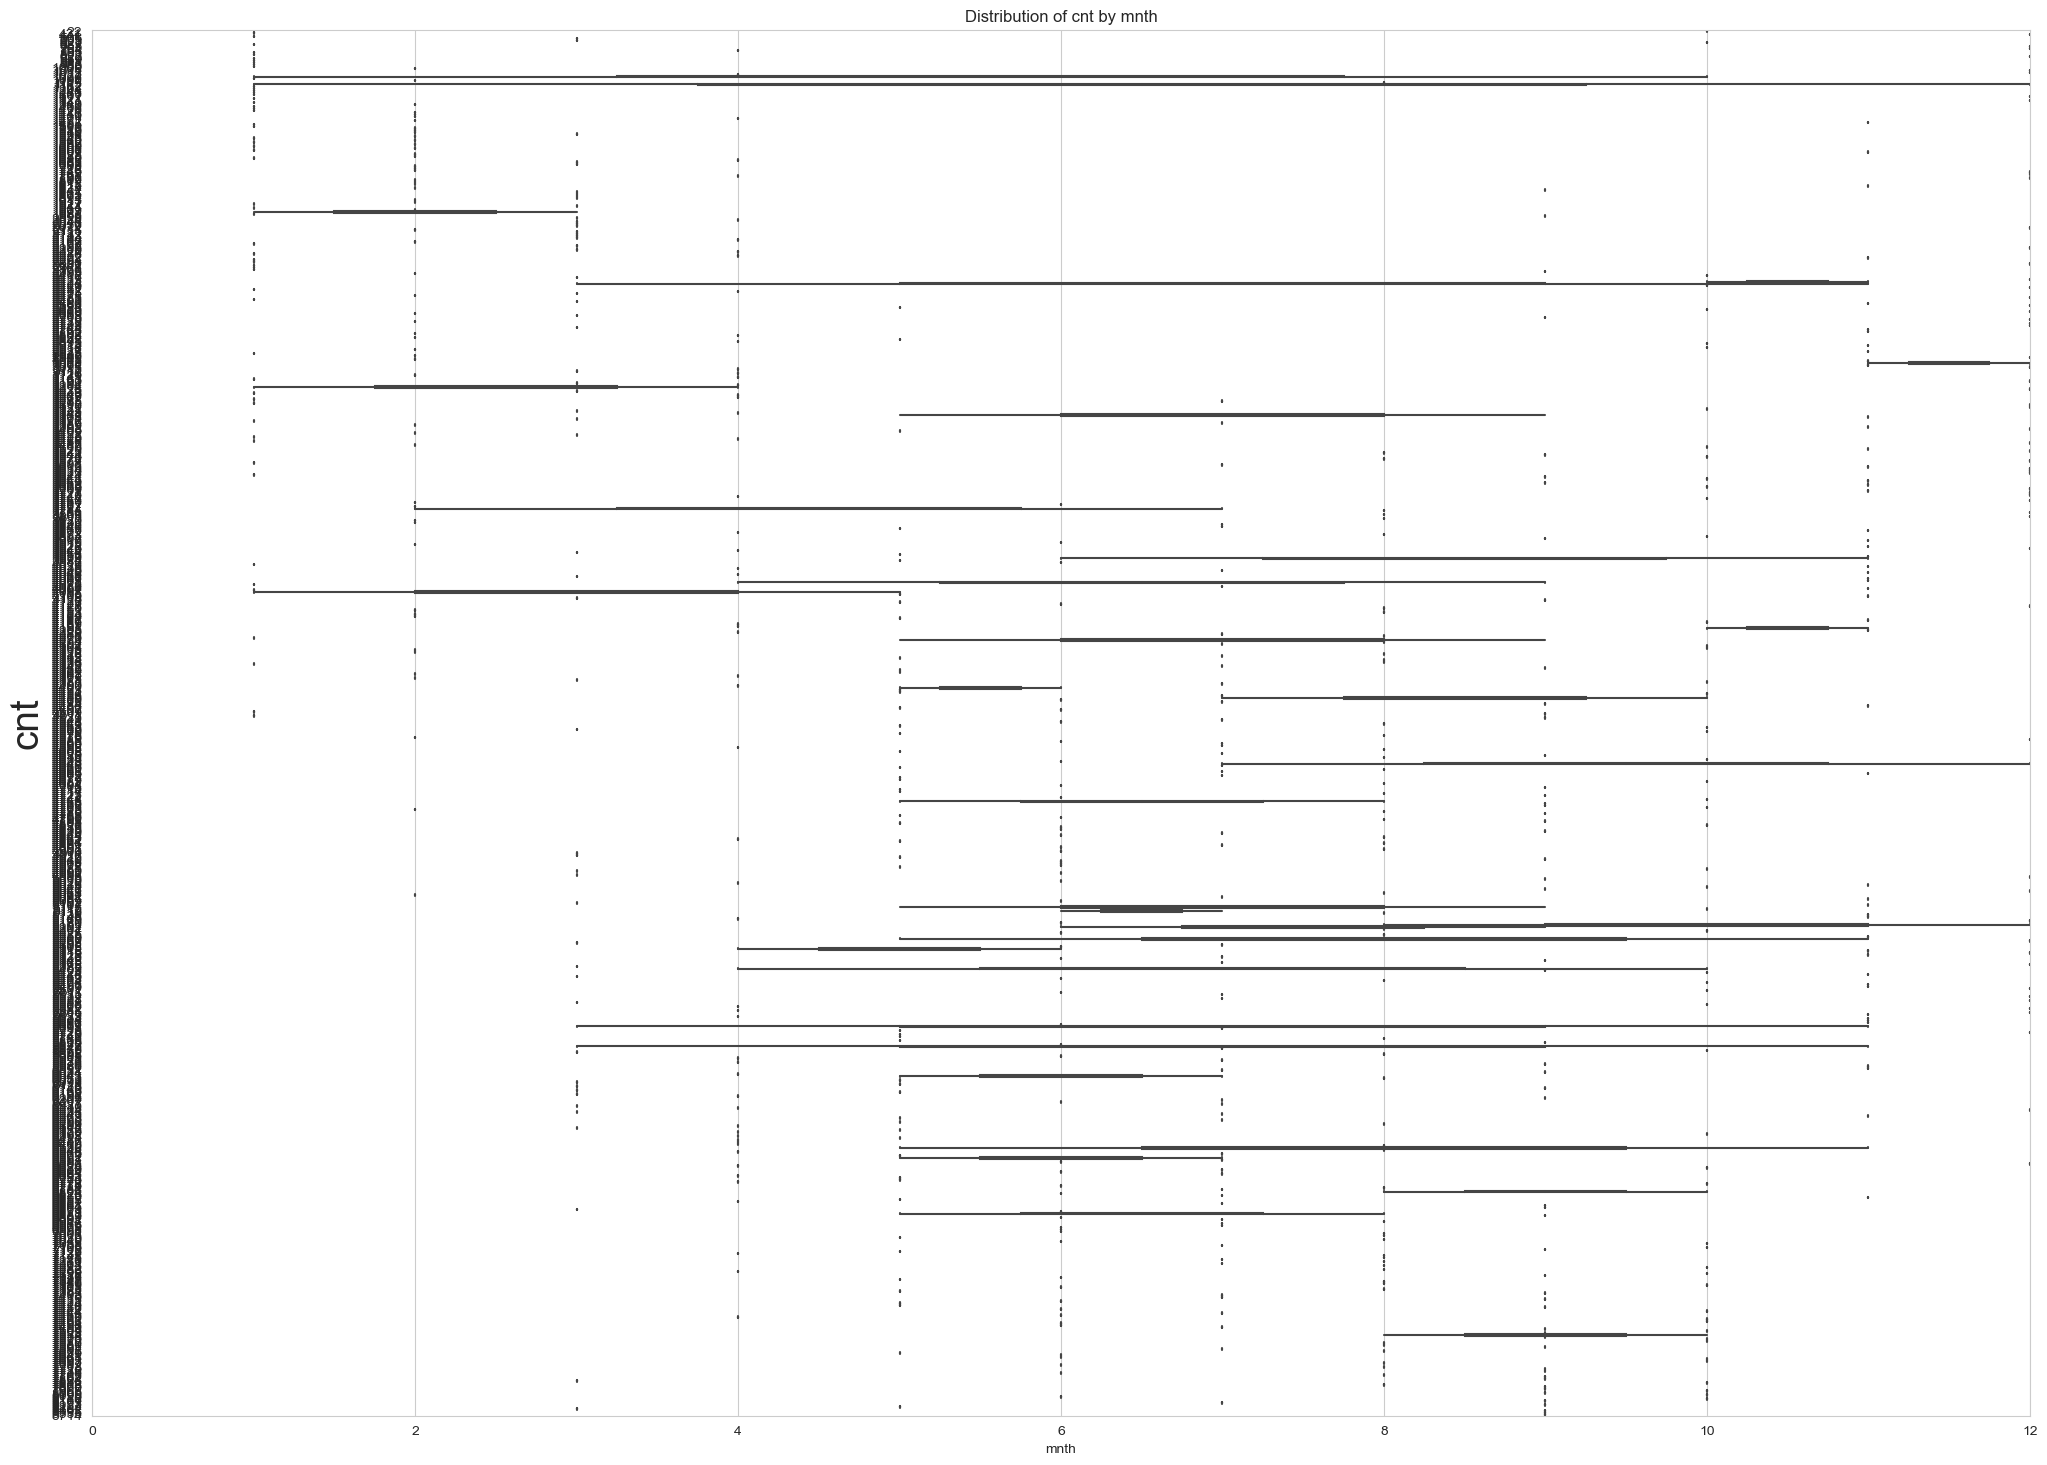

In [14]:
sns.set_style('whitegrid')
sns.set_palette("husl")
fig, ax = plt.subplots(figsize=(25, 18))
ax.set_ylim(0, 9000)
ax.set_xlim(0, 12)
sns.boxplot(x='mnth', y='cnt', data=bikes, orient='h')
plt.title('Distribution of cnt by mnth')
plt.xlabel('mnth')
plt.ylabel('cnt', fontsize=28)
plt.show()

Text(0, 0.5, 'cnt')

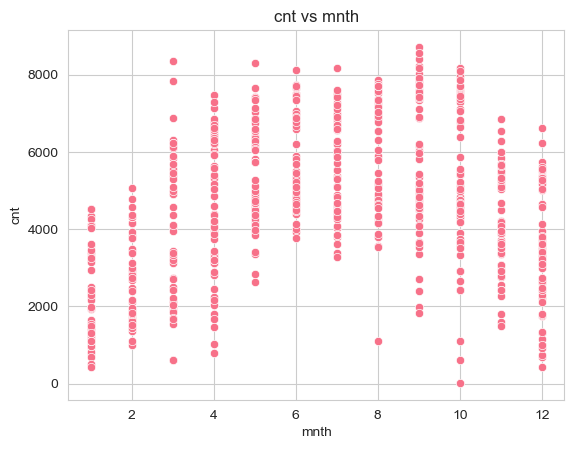

In [15]:
sns.scatterplot(data=bikes, x='mnth', y='cnt')
ax.set_ylim(0, 9000)
ax.set_xlim(0, 14)
plt.title('cnt vs mnth')
plt.xlabel('mnth')
plt.ylabel('cnt')

***

***

Fixing columns and data types

In [16]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


Extract day from dteday column

In [17]:
f = lambda x : x.split("-")[2]

# f = lambda x : x.split("-")[0]   ... in order to extract the year (0=> 1st position, 1=> 2nd position, etc.)

In [18]:
bikes["dteday"] = bikes["dteday"].apply(f)
# this creates / replaces the column "bikes["dteday"]" by the extraction of the "[0]" position from the previus lamda function.

In [19]:
bikes.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
bikes.tail(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Assign names to values of season column

In [21]:
def seasn(x):
    if x==1:
        return("winter")
    elif x == 2:
        return("spring")
    elif x == 3:
        return("summer")
    else:
        return("fall")

In [22]:
# Applying the function to the "season" column:
bikes["season"] = bikes["season"].apply(seasn)

In [23]:
bikes[["season"]].head(3)  # Check if conversion is proper

,season
0,winter
1,winter
2,winter


In [24]:
bikes[["season"]].tail(3)  # Check if conversion is proper

,season
728,winter
729,winter
730,winter


Counts per each season

In [25]:
season_counts = bikes.groupby("season")["cnt"].sum()

print(season_counts)

season
fall       841613
spring     918589
summer    1061129
winter     471348
Name: cnt, dtype: int64


Counts per each season in percentages

In [26]:
total_counts = season_counts.sum()
season_percentages = (season_counts / total_counts) * 100
print(season_percentages)


season
fall      25.560129
spring    27.897921
summer    32.226919
winter    14.315030
Name: cnt, dtype: float64


Assign names to values of weathersit column

In [27]:
def wsit(x):
    if x==1:
        return("Clear - Few clouds")
    elif x == 2:
        return("Mist + Cloudy")
    elif x == 3:
        return(" Light Snow - Light Rain")
    else:
        return("Heavy Rain")

In [28]:
bikes["weathersit"] = bikes["weathersit"].apply(wsit)

In [29]:
bikes[["weathersit"]].head()  # Check if conversion is proper

,weathersit
0,Mist + Cloudy
1,Mist + Cloudy
2,Clear - Few clouds
3,Clear - Few clouds
4,Clear - Few clouds


In [30]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801


3.5 Univariate Analysis

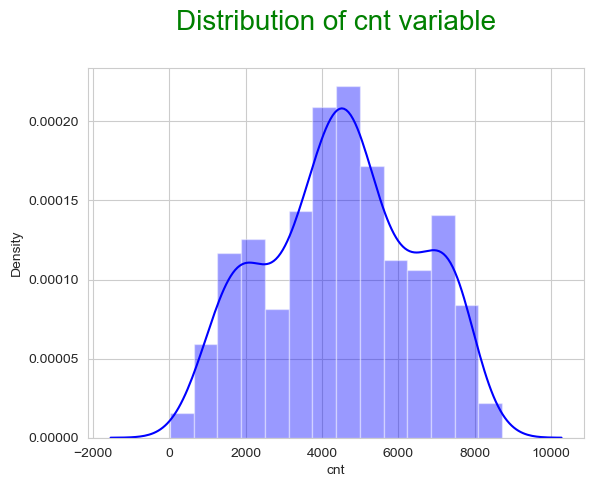

In [31]:
# Analyse cnt variable
sns.distplot(bikes["cnt"], color="blue")
plt.title("Distribution of cnt variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

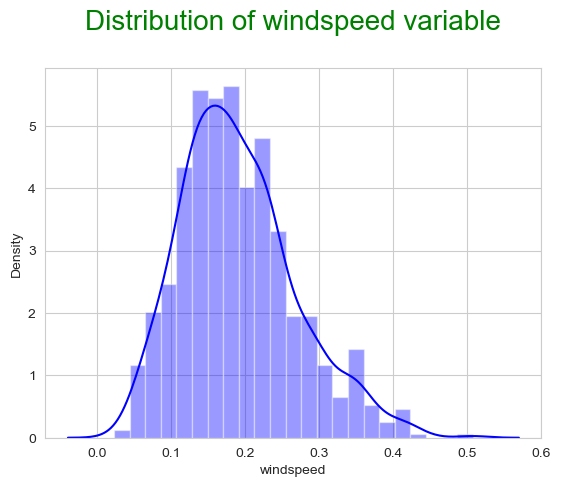

In [32]:
# Analyse windspeed variable
sns.distplot(bikes["windspeed"], color="blue")
plt.title("Distribution of windspeed variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

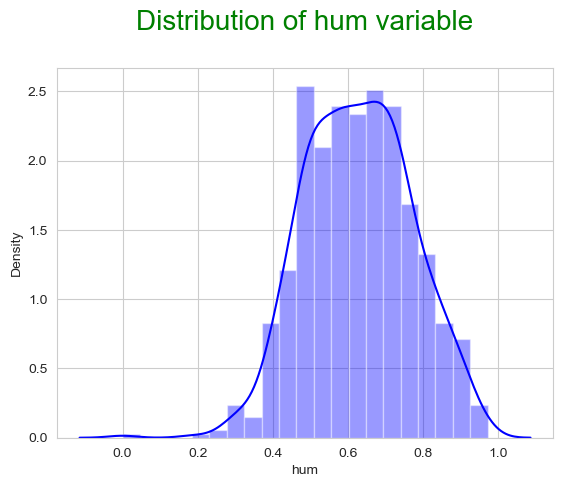

In [33]:
# Analyse hum variable
sns.distplot(bikes["hum"], color="blue")
plt.title("Distribution of hum variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

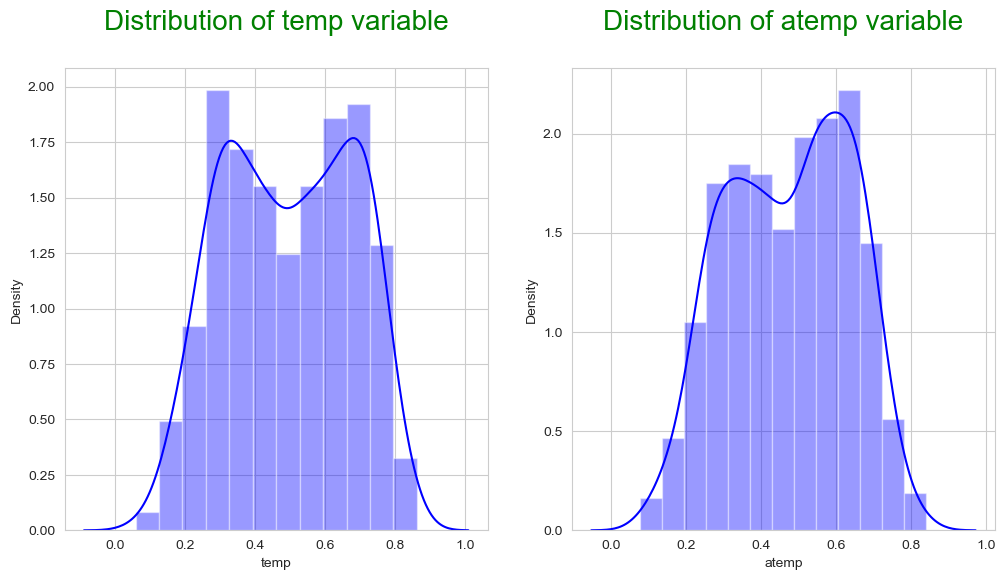

In [34]:
# Analyse temp and atemp variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(bikes["temp"], color="blue")
plt.title("Distribution of temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.distplot(bikes["atemp"], color="blue")
plt.title("Distribution of atemp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

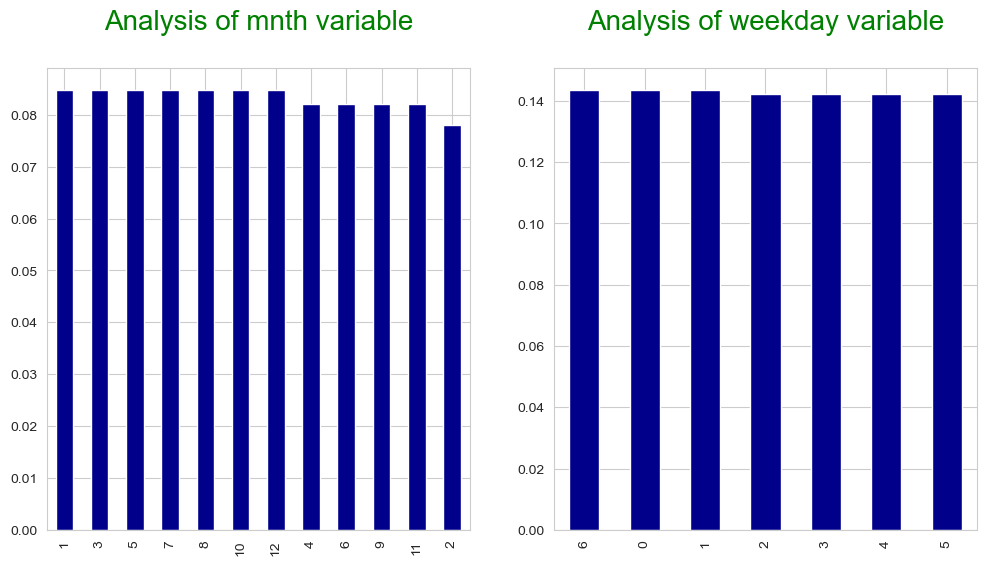

In [35]:
# Analyse mnth and weekday variables (single variable for each graph)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["mnth"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weekday"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

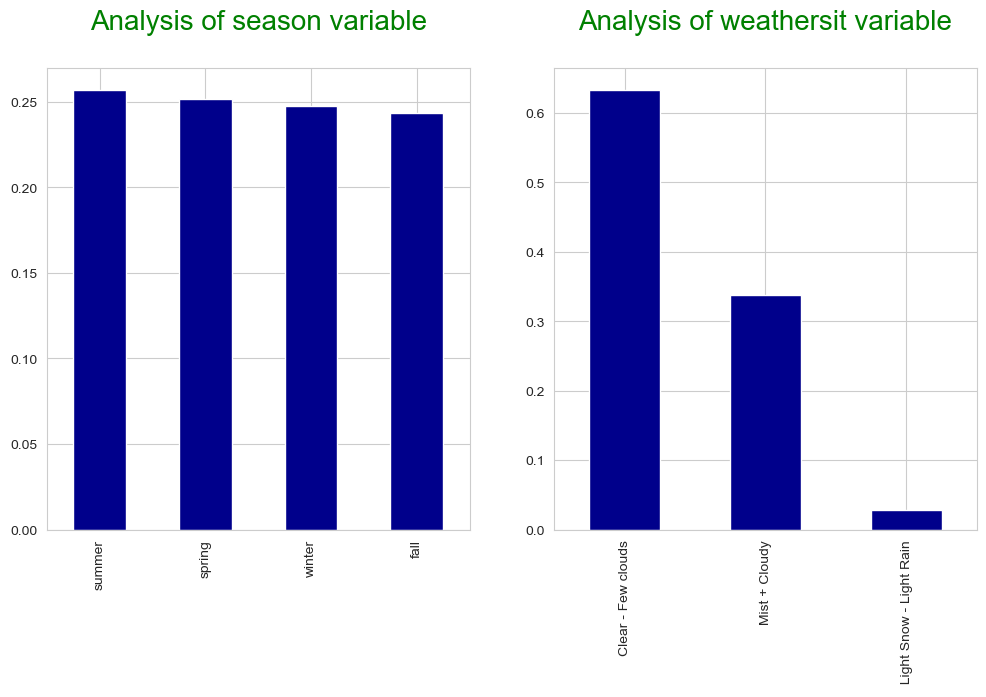

In [36]:
# Analyse season and weathersit variables (single variable for each graph)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["season"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weathersit"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

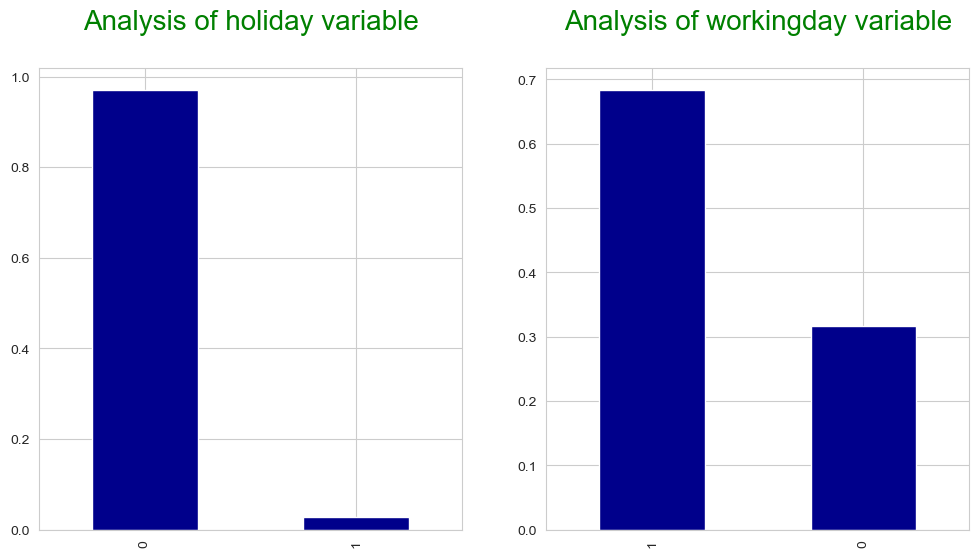

In [37]:
# Analyse holiday and workingday variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["holiday"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of holiday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["workingday"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of workingday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

In [38]:
bikes

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03,winter,0,1,0,1,1,Clear - Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04,winter,0,1,0,2,1,Clear - Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05,winter,0,1,0,3,1,Clear - Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27,winter,1,12,0,4,1,Mist + Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,28,winter,1,12,0,5,1,Mist + Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,29,winter,1,12,0,6,0,Mist + Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,30,winter,1,12,0,0,0,Clear - Few clouds,0.255833,0.231700,0.483333,0.350754,364,1432,1796


3.6 Bivariate Analysis

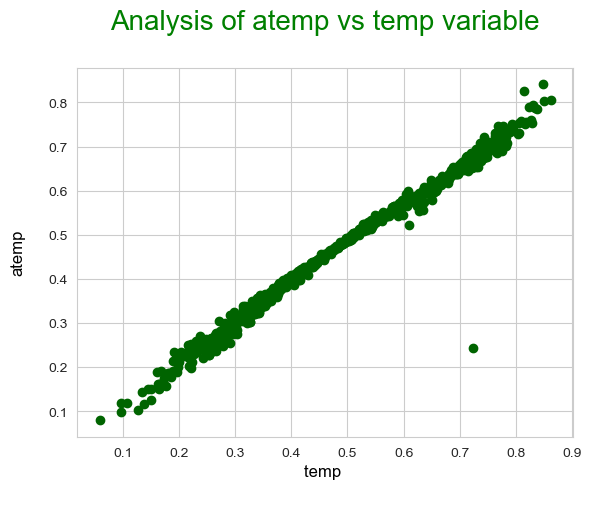

In [39]:
# Scatter plot of atemp vs temp variable
plt.scatter(bikes["temp"], bikes["atemp"], color="darkgreen")
plt.title("Analysis of atemp vs temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("temp \n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("atemp\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [40]:
bikes.groupby("season")["cnt"].sum()

season
fall       841613
spring     918589
summer    1061129
winter     471348
Name: cnt, dtype: int64

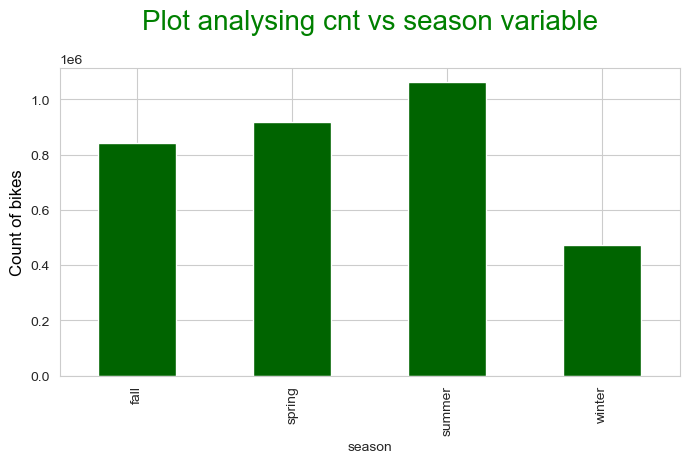

In [41]:
# cnt vs season

plt.figure(figsize= (8,4))
bikes.groupby("season")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt vs season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

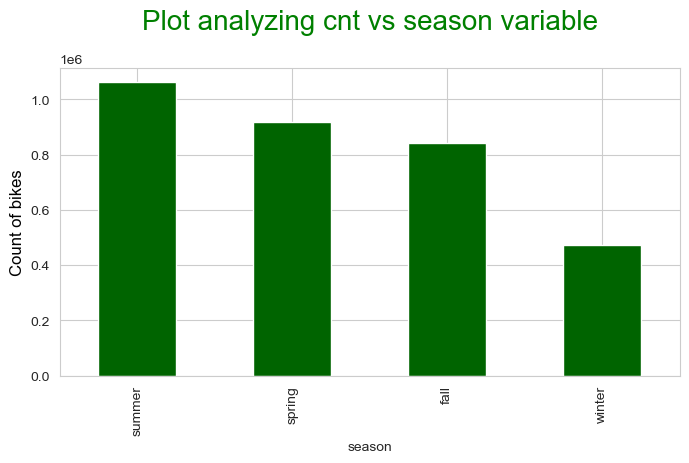

In [42]:
# cnt vs season (decreasing)

plt.figure(figsize=(8,4))
bikes.groupby("season")["cnt"].sum().sort_values(ascending=False).plot.bar(color="darkgreen")
plt.title("Plot analyzing cnt vs season variable\n", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight': 5, 'color': 'Black'})
plt.show()

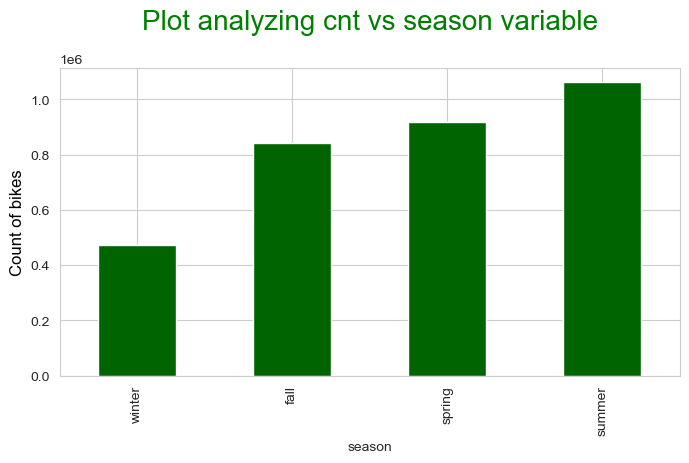

In [43]:
# cnt vs season (increasing)

plt.figure(figsize=(8,4))
bikes.groupby("season")["cnt"].sum().sort_values(ascending=True).plot.bar(color="darkgreen")
plt.title("Plot analyzing cnt vs season variable\n", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight': 5, 'color': 'Black'})
plt.show()

***

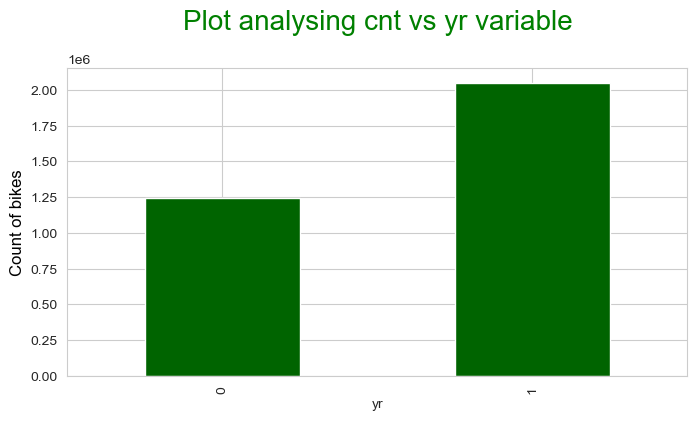

In [44]:
# cnt vs yr

plt.figure(figsize= (8,4))
bikes.groupby("yr")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt vs yr variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

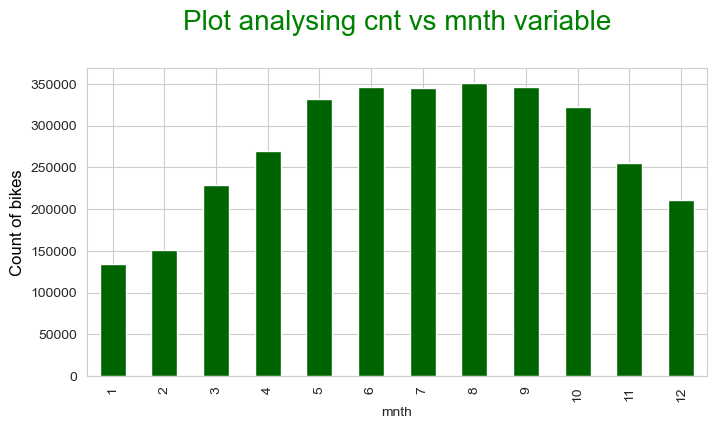

In [45]:
# cnt vs mnth

plt.figure(figsize= (8,4))
bikes.groupby("mnth")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt vs mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

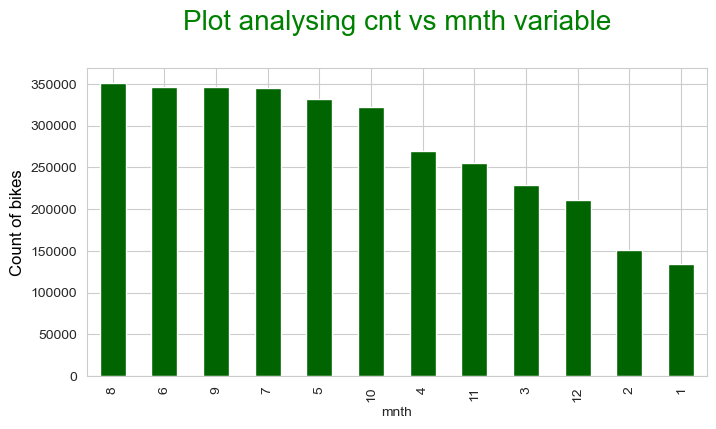

In [46]:
# cnt vs mnth (decreasing)

plt.figure(figsize= (8,4))
bikes.groupby("mnth")["cnt"].sum().sort_values(ascending=False).plot.bar(color="darkgreen")
plt.title("Plot analysing cnt vs mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


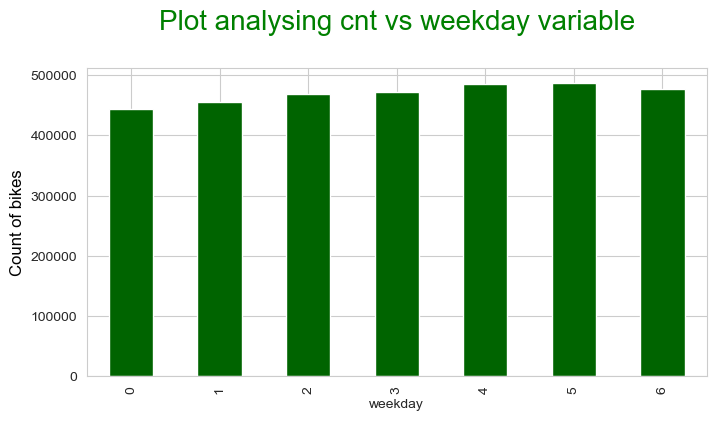

In [47]:
# cnt vs weekday

plt.figure(figsize= (8,4))
bikes.groupby("weekday")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt vs weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

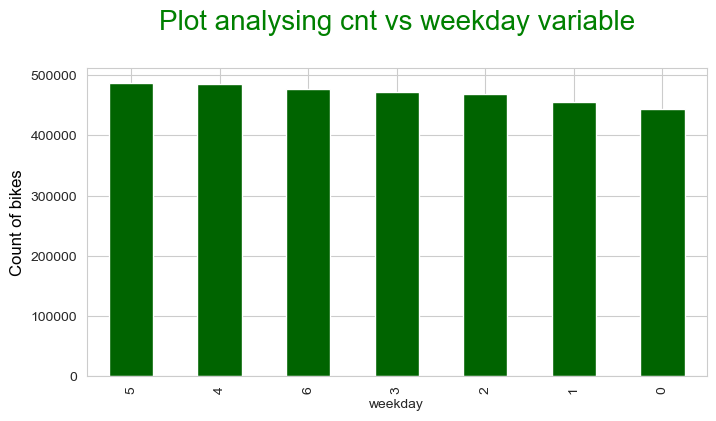

In [48]:
# cnt vs weekday (decreasing)

plt.figure(figsize= (8,4))
bikes.groupby("weekday")["cnt"].sum().sort_values(ascending=False).plot.bar(color="darkgreen")
plt.title("Plot analysing cnt vs weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

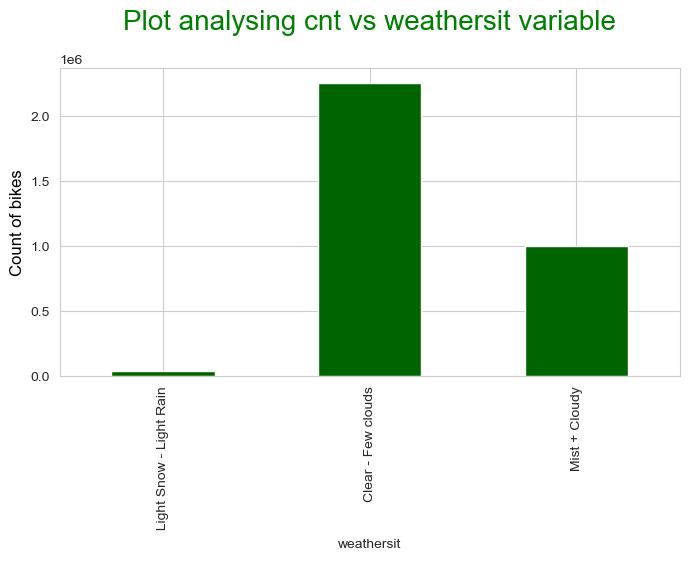

In [49]:
# cnt vs weathersit

plt.figure(figsize= (8,4))
bikes.groupby("weathersit")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt vs weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

3.7 Multivariate Analysis

** fix the color ...pending

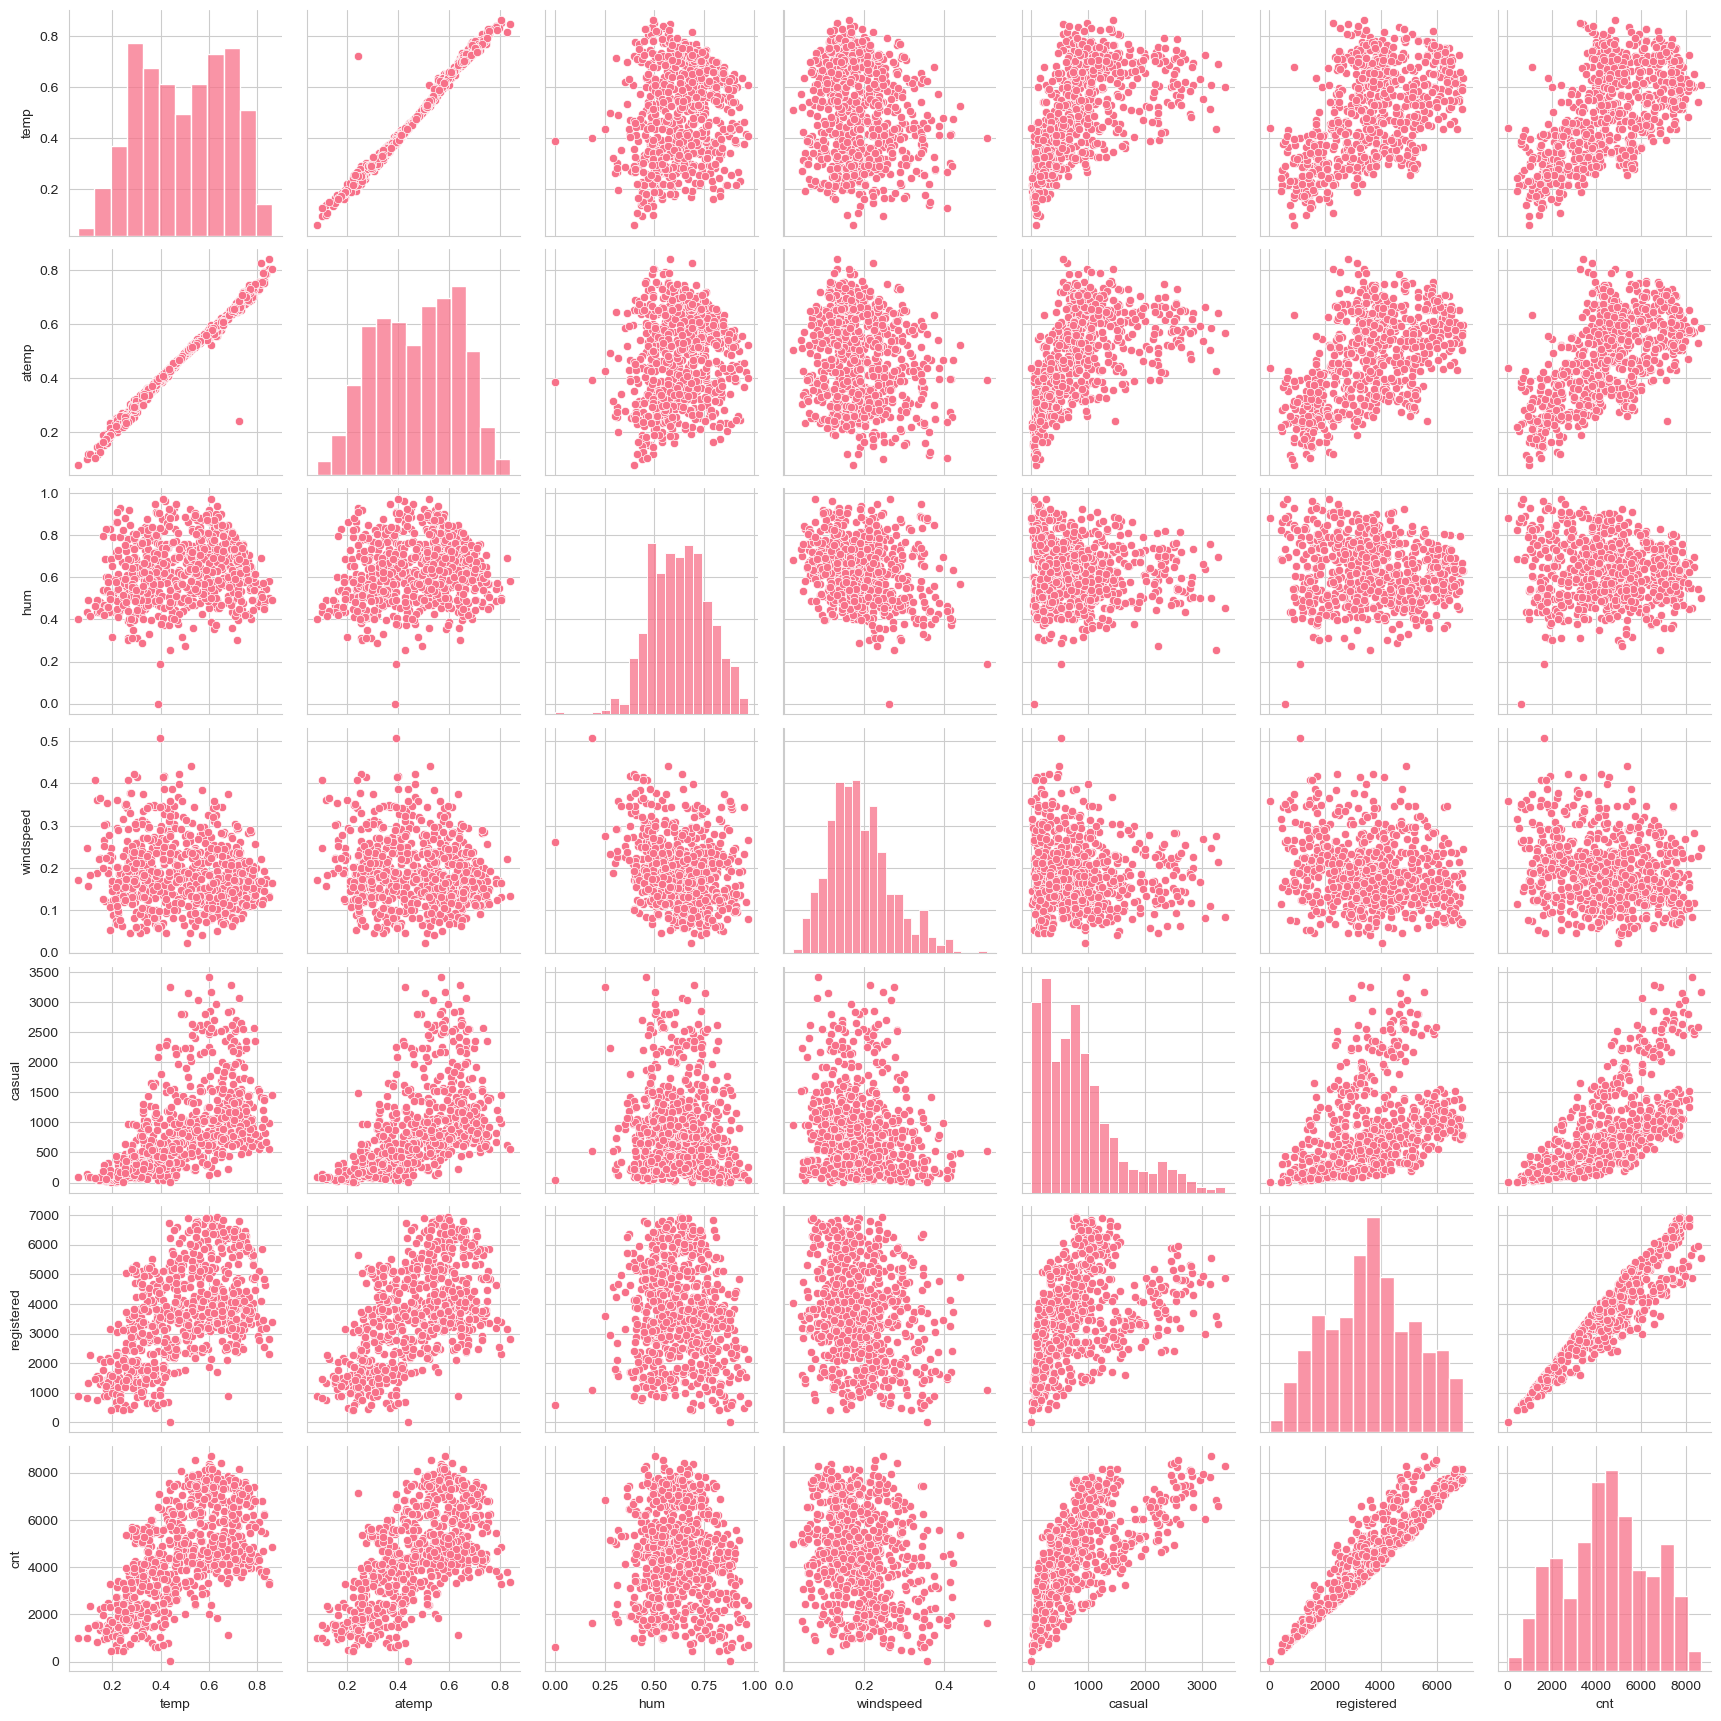

In [50]:
# Pair plot of our data variables

sns.pairplot(data=bikes, vars=["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"], palette="Blues", markers="o")
plt.show()

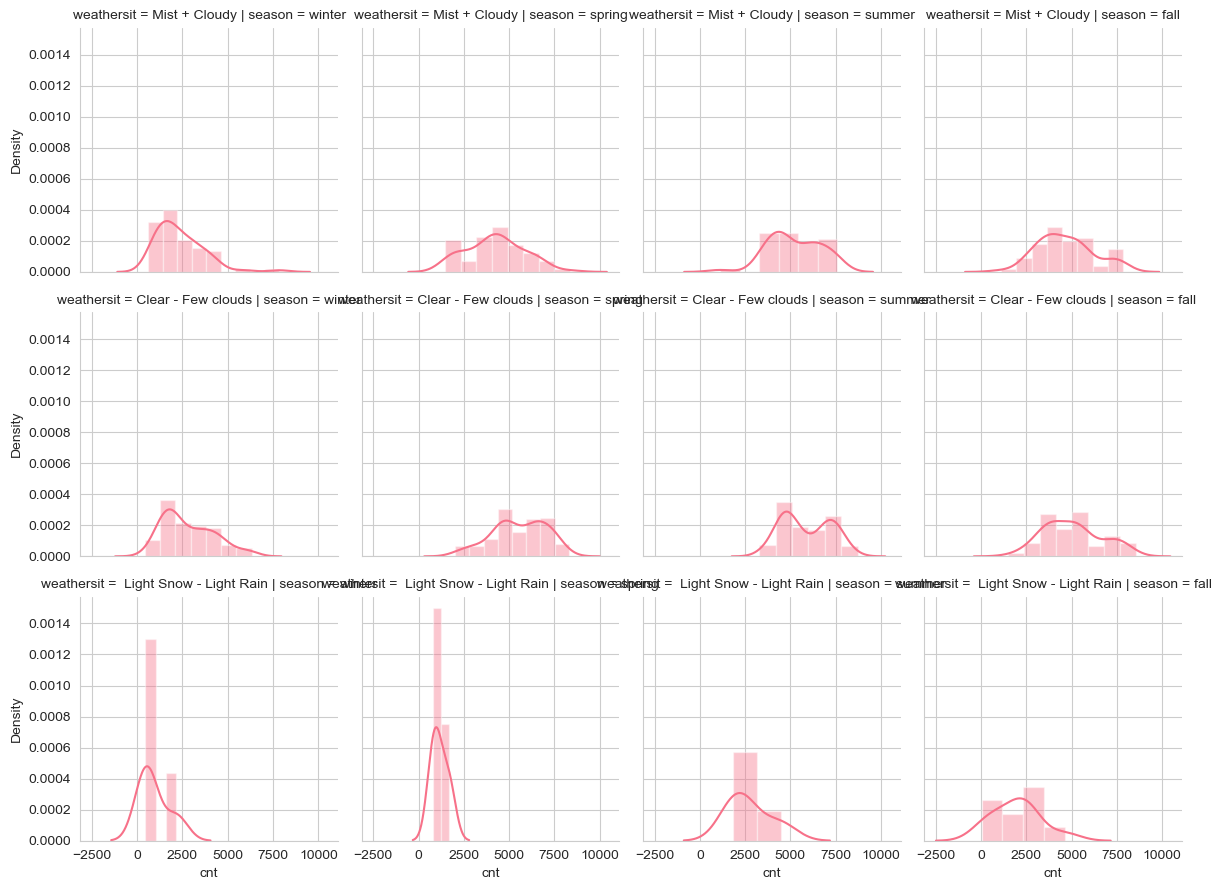

In [51]:
# FacetGrid plot of cnt vs weathersit and season

#sns.FacetGrid(bikes, col = 'season', row = 'weathersit').map(sns.distplot, 'cnt')
#plt.show()

#Plus Legend
grid = sns.FacetGrid(bikes, col='season', row='weathersit')
grid.map(sns.distplot, 'cnt')
grid.add_legend()
plt.show()


** How to add legends?

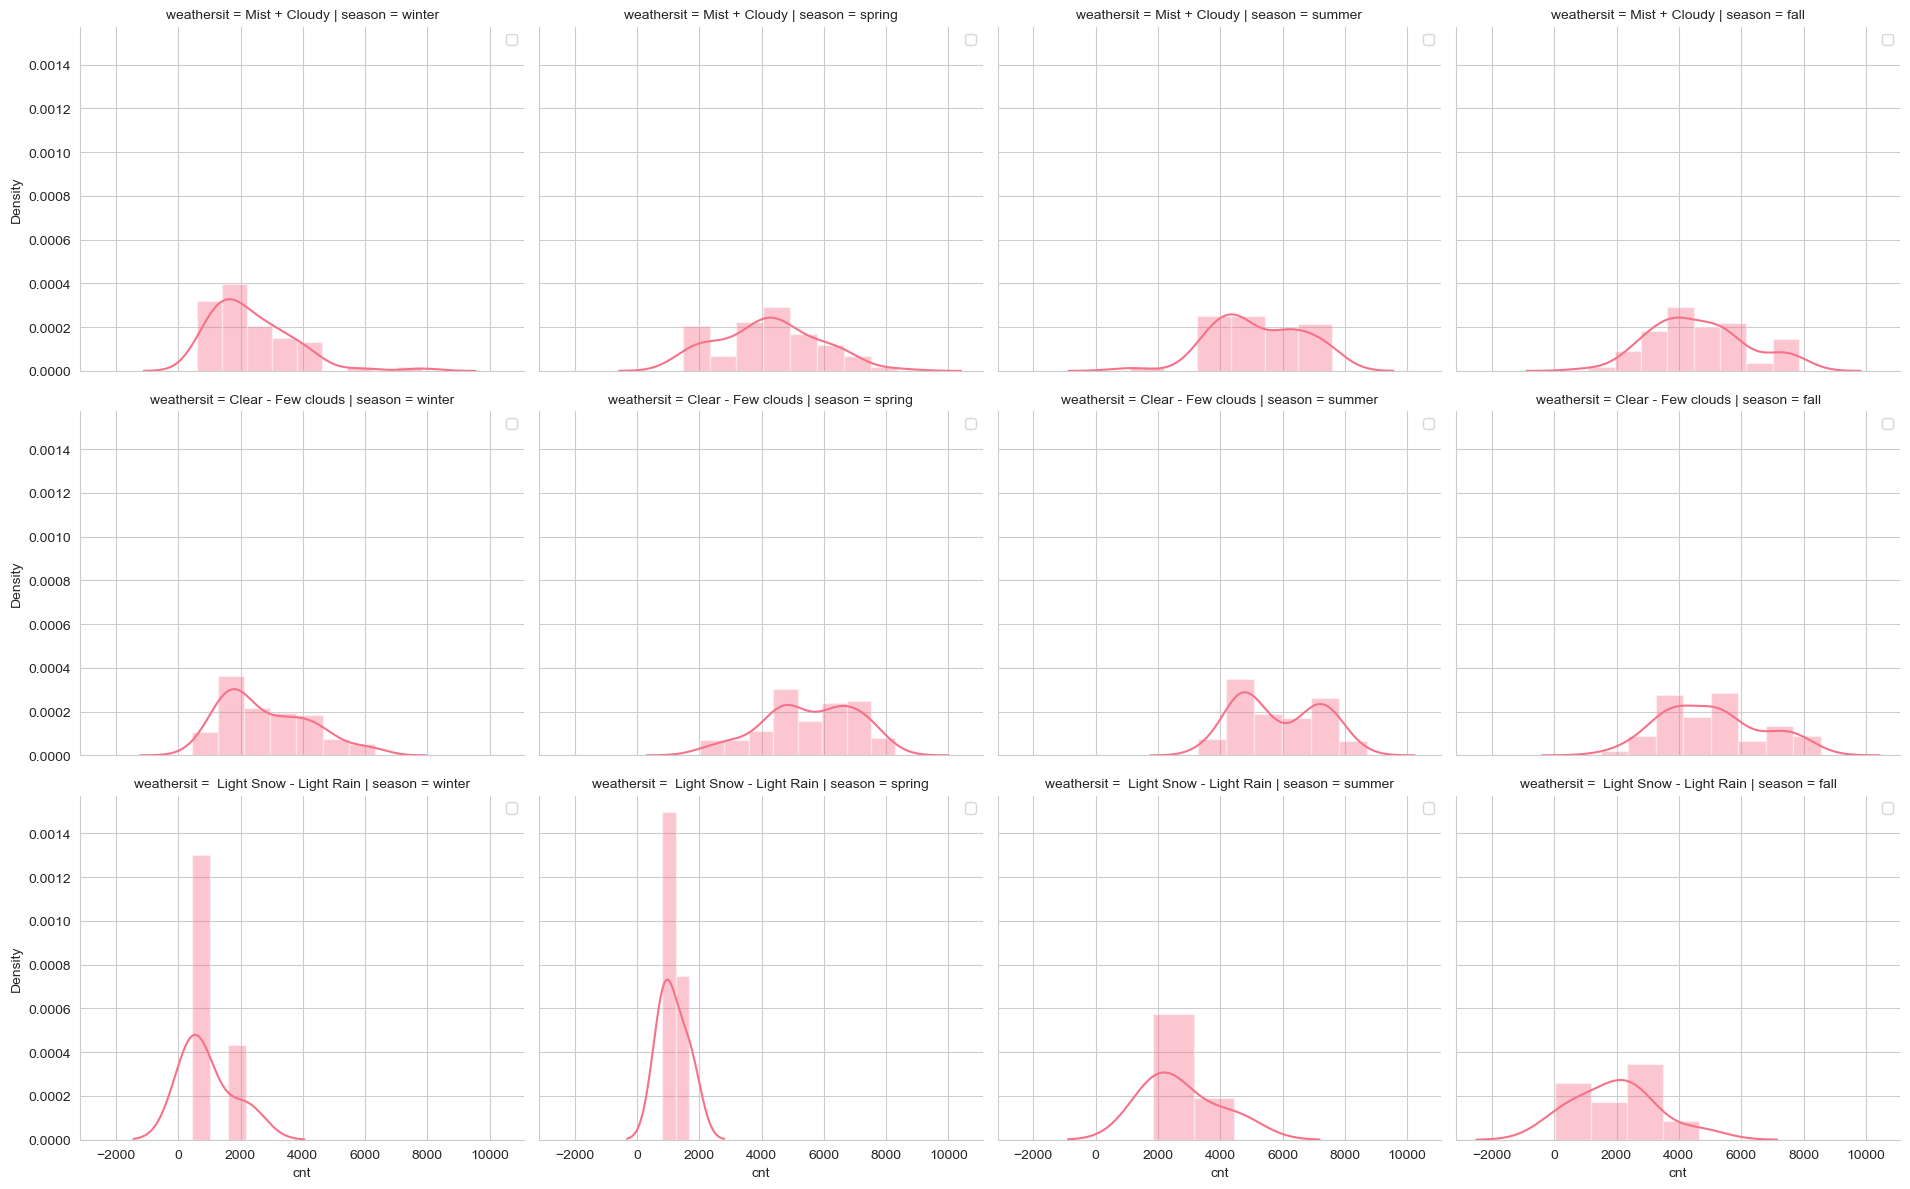

In [52]:
g = sns.FacetGrid(bikes, col='season', row='weathersit', height=4, aspect=1.2)
g = g.map(sns.distplot, 'cnt')

# Get the axes of the FacetGrid
axes = g.axes

# Iterate over each subplot and add a legend
for ax in axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

plt.show()

The curve represents the probability density function (PDF) or kernel density estimation (KDE) of the data distribution.

When you use `sns.distplot` to plot a histogram, it not only displays the bars representing the count or frequency of data in each bin but also overlays a smooth curve on top of the bars. This curve is an estimate of the underlying probability density function of the data distribution.

The curve helps visualize the shape of the distribution and provides a smooth representation of the data density. It is particularly useful when the data is continuous or when you want to visualize the overall distribution rather than just the individual data points.

Note that the appearance and interpretation of the curve can be influenced by parameters such as the number of bins or the bandwidth used for KDE estimation. These parameters can be adjusted to achieve a better representation of the data distribution.

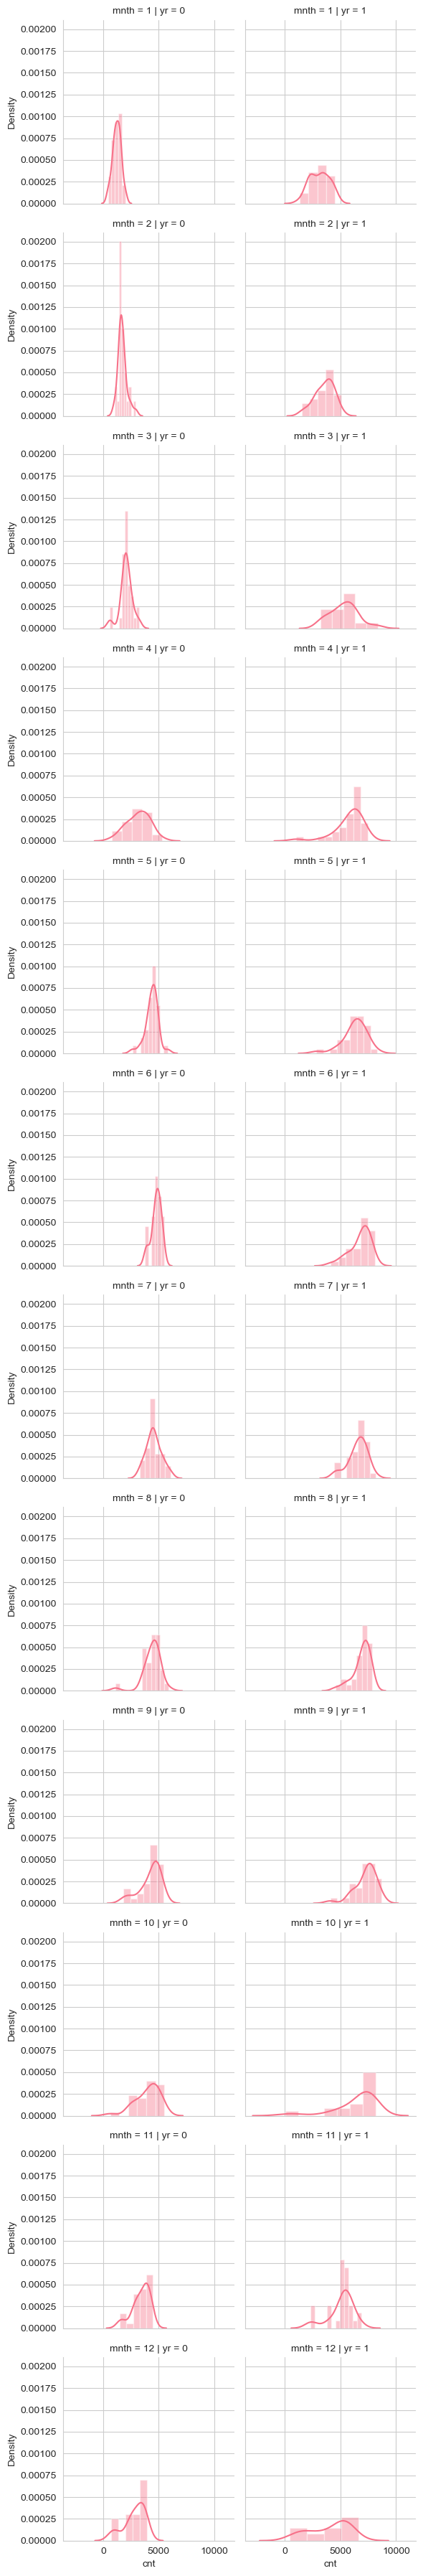

In [53]:
# FacetGrid plotof cnt vs yr and mnth

sns.FacetGrid(bikes, col = 'yr', row = 'mnth').map(sns.distplot, 'cnt')
plt.show()

###### Using the seaborn library in Python to create a grid of distribution plots (histograms) for the 'cnt' variable in your dataset, grouped by the values of 'yr' (year) and 'mnth' (month) variables.

###### The code step by step:

###### sns.FacetGrid(bikes, col='yr', row='mnth'): This line creates a FacetGrid object from the seaborn library. It takes the 'bikes' DataFrame as the data source and specifies that the grid will have columns based on the 'yr' variable and rows based on the 'mnth' variable. This means that the resulting grid will have different plots for each combination of year and month.

###### .map(sns.distplot, 'cnt'): This line maps the distribution plot (sns.distplot) function to each subplot in the FacetGrid. It specifies that the 'cnt' variable should be plotted on the x-axis of each histogram. The map function applies the specified plotting function to each subplot in the grid.

###### plt.show(): This line displays the grid of distribution plots using the plt.show() function from the matplotlib library. It shows the generated plot on the screen.

###### In summary, the code generates a grid of histograms, where each histogram represents the distribution of the 'cnt' variable for different combinations of year and month. This can be useful for visualizing the distribution of the 'cnt' variable across different time periods.

### Inferences from EDA :
1. Bikes demand is more in 2012 as compared to 2011.
2. Bikes demand is more from April to September, on average.
3. Bikes demand is more from Thursday to Saturday, on average.
4. Bikes demand is more in "Clear - Few clouds" weather.

### 4. Linear Regression Model building

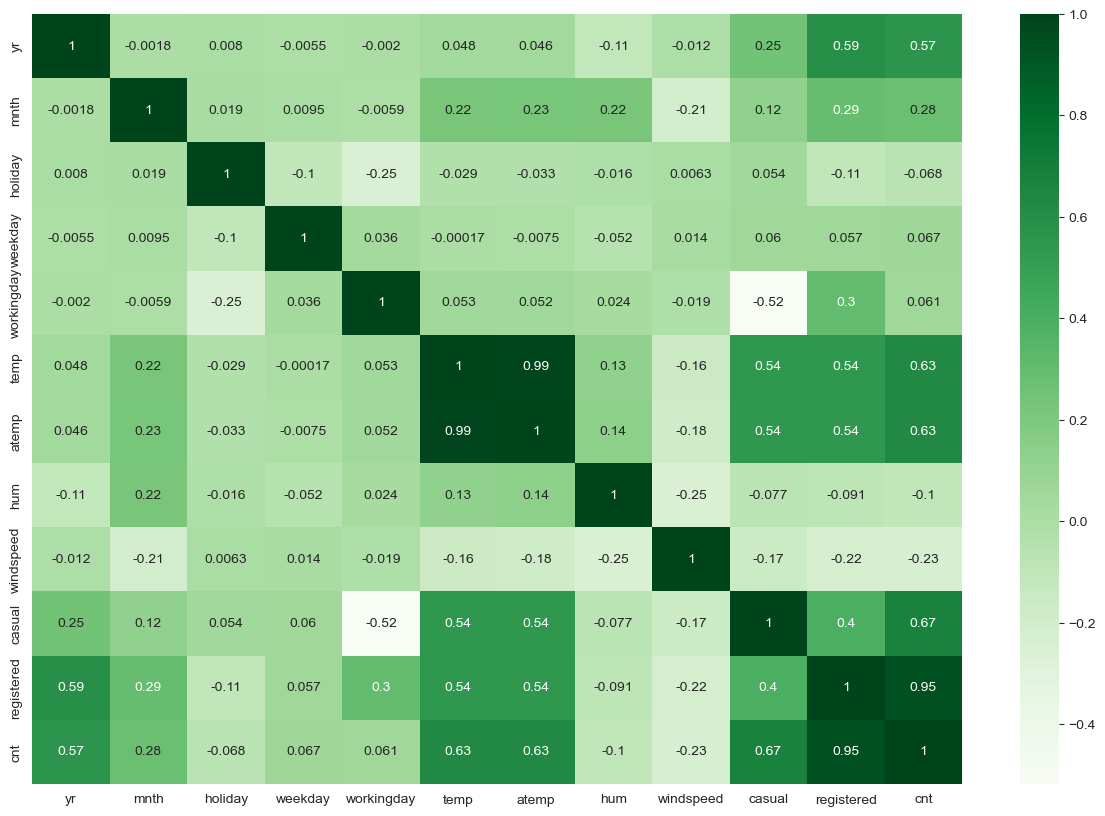

In [54]:
# Heatmap for correlation of variables

plt.figure(figsize=(15,10))
sns.heatmap(bikes.corr(), cmap = "Greens", annot = True)
plt.show()

...temp and atemp have high correlation. From bivariate analysis we have seen that they are just two variables representing simliar data. Also registered and cnt have high correlation. cnt column is just total of casual and registered columns and it is our target variable. So we drop temp, casual and registered columns from our data.

In [55]:
bikes.drop(['temp','casual','registered'], axis = 1, inplace = True)

 ...drop_first=True, it drops the first category column (in this case, "spring") to avoid multicollinearity issues when using the dummy variables in regression models. This is a common practice, especially when using dummy variables in linear regression analysis.

**4.1 Encoding categorical variables**

season and weathersit seem to be **nominal variables** that do not have any inherent order. So we encode them using pd.get_dummies

In [56]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.363625,0.805833,0.160446,985
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.353739,0.696087,0.248539,801


In [57]:
# Converting into a separate binary columns

new_season = pd.get_dummies(bikes['season'], drop_first=True)

pd.get_dummies(bikes['season'], drop_first=True) is a function call that creates dummy variables for the "season" column. Dummy variables are a way to represent categorical variables as binary (0 or 1) variables. Each unique category in the "season" column will be converted into a separate binary column.

drop_first=True is an optional parameter that specifies whether to drop the first dummy variable column. When drop_first=True, it drops the first category column (in this case, "spring") to avoid multicollinearity issues when using the dummy variables in regression models. This is a common practice, especially when using dummy variables in linear regression analysis.
new_season is the resulting DataFrame that contains the newly created dummy variables for the "season" column. Each column in new_season represents a unique season category, and the values in each column indicate whether the corresponding row belongs to that season (1 for True, 0 for False).

By using pd.get_dummies() with the drop_first=True parameter, the code creates a set of dummy variables for the "season" column, which can be useful for further analysis or modeling tasks that require numerical representations of categorical variables.

In [58]:
new_season

,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
726,0,0,1
727,0,0,1
728,0,0,1
729,0,0,1


In [59]:
bikes = pd.concat([bikes, new_season], axis = 1)

In [60]:
bikes.head()  # see weather concatenation is proper

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.363625,0.805833,0.160446,985,0,0,1
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.353739,0.696087,0.248539,801,0,0,1
2,03,winter,0,1,0,1,1,Clear - Few clouds,0.189405,0.437273,0.248309,1349,0,0,1
3,04,winter,0,1,0,2,1,Clear - Few clouds,0.212122,0.590435,0.160296,1562,0,0,1
4,05,winter,0,1,0,3,1,Clear - Few clouds,0.229270,0.436957,0.186900,1600,0,0,1


In [61]:
new_weathersit = pd.get_dummies(bikes['weathersit'], drop_first=True)

In [62]:
new_weathersit.head()

,Clear - Few clouds,Mist + Cloudy
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [63]:
bikes = pd.concat([bikes, new_weathersit], axis = 1)

In [64]:
bikes.head()  # see weather concatenation is proper

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
0,01,winter,0,1,0,6,0,Mist + Cloudy,0.363625,0.805833,0.160446,985,0,0,1,0,1
1,02,winter,0,1,0,0,0,Mist + Cloudy,0.353739,0.696087,0.248539,801,0,0,1,0,1
2,03,winter,0,1,0,1,1,Clear - Few clouds,0.189405,0.437273,0.248309,1349,0,0,1,1,0
3,04,winter,0,1,0,2,1,Clear - Few clouds,0.212122,0.590435,0.160296,1562,0,0,1,1,0
4,05,winter,0,1,0,3,1,Clear - Few clouds,0.229270,0.436957,0.186900,1600,0,0,1,1,0


In [65]:
bikes.drop('season', axis = 1, inplace = True)    # drop season column

In [66]:
bikes.drop('weathersit', axis = 1, inplace = True)     # drop weathersit column

In [67]:
bikes.head(2)

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
0,01,0,1,0,6,0,0.363625,0.805833,0.160446,985,0,0,1,0,1
1,02,0,1,0,0,0,0.353739,0.696087,0.248539,801,0,0,1,0,1


dteday, mnth and weekday are also categorical variables. But the number of levels in these columns are too high. So we use LabelEncoder to encode them.

In [68]:
from sklearn.preprocessing import LabelEncoder     # import LabelEncoder

In [69]:
var = ["dteday", "mnth", "weekday"]

In [70]:
le = LabelEncoder()  # Create instance le for LabelEncoder

In [71]:
f = lambda x : le.fit_transform(x)

In [72]:
bikes[var] = bikes[var].apply(f)

To encode categorical variables into numerical label

By using LabelEncoder, the code transforms the categorical variables in the specified columns of the "bikes" DataFrame into numerical labels, making them suitable for certain machine learning algorithms that require numerical inputs.

le = LabelEncoder(): This line initializes an instance of the LabelEncoder class and assigns it to the variable le. The LabelEncoder object will be used to perform the encoding.

f = lambda x: le.fit_transform(x): This line defines a lambda function f that takes a column x as input and applies the fit_transform() method of the LabelEncoder object le to transform the column into encoded labels. The fit_transform() method fits the encoder on the column's unique values and transforms the column into numerical labels.

bikes[var] = bikes[var].apply(f): This line applies the lambda function f to each column specified in the var list ("dteday", "mnth", and "weekday") in the "bikes" DataFrame. It transforms the categorical values in those columns into numerical labels using the LabelEncoder.

In [73]:
bikes.head(60)

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
0,0,0,0,0,6,0,0.363625,0.805833,0.160446,985,0,0,1,0,1
1,1,0,0,0,0,0,0.353739,0.696087,0.248539,801,0,0,1,0,1
2,2,0,0,0,1,1,0.189405,0.437273,0.248309,1349,0,0,1,1,0
3,3,0,0,0,2,1,0.212122,0.590435,0.160296,1562,0,0,1,1,0
4,4,0,0,0,3,1,0.229270,0.436957,0.186900,1600,0,0,1,1,0
5,5,0,0,0,4,1,0.233209,0.518261,0.089565,1606,0,0,1,1,0
6,6,0,0,0,5,1,0.208839,0.498696,0.168726,1510,0,0,1,0,1
7,7,0,0,0,6,0,0.162254,0.535833,0.266804,959,0,0,1,0,1
8,8,0,0,0,0,0,0.116175,0.434167,0.361950,822,0,0,1,1,0
9,9,0,0,0,1,1,0.150888,0.482917,0.223267,1321,0,0,1,1,0


4.2 Split the data set into df_train and df_test

In [74]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

By using train_test_split, the code splits the "bikes" DataFrame into two separate datasets: one for training the model (70% of the data) and one for testing the model's performance (30% of the data). This is a common practice in machine learning to evaluate how well the model generalizes to unseen data. The random seed (random_state) ensures that the split is consistent across different runs of the code.

In [75]:
df_train.shape

(511, 15)

In [76]:
df_test.shape

(220, 15)

4.3 Scale the numerical variables of train data

In order that we get optimum values of co-efficients and a good model fit, we need to bring all the values to a uniform range. This is achieved by scaling. An additional reason why scaling is applied is that the Gradient Descent method that we use to minimize our underlying cost function, converges much faster with scaling than without it.

In [77]:
scaler = MinMaxScaler()

In [78]:
scale_var = ["dteday", "mnth","weekday", "atemp", "hum", "windspeed", "cnt"]

In [79]:
df_train[scale_var] = scaler.fit_transform(df_train[scale_var])  # Scaling of train set 

In [80]:
df_train.describe()  # Check if scaling is proper

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.488193,0.508806,0.503291,0.023483,0.499674,0.667319,0.512443,0.648573,0.317963,0.515061,0.246575,0.260274,0.244618,0.624266,0.348337
std,0.297355,0.500412,0.315409,0.151581,0.339566,0.471635,0.213364,0.148691,0.165339,0.225338,0.431440,0.439214,0.430282,0.484786,0.476910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.181818,0.000000,0.166667,0.000000,0.332910,0.534994,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.545455,0.000000,0.500000,1.000000,0.516885,0.653499,0.294121,0.519903,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.733333,1.000000,0.818182,0.000000,0.833333,1.000000,0.684716,0.755689,0.406058,0.691498,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


By using MinMaxScaler, the code scales the selected variables in the training dataset to a specified range. This is done to ensure that variables with different scales do not disproportionately influence the learning algorithm. The heatmap provides a visual representation of the correlation between variables, allowing you to analyze the relationships between them.

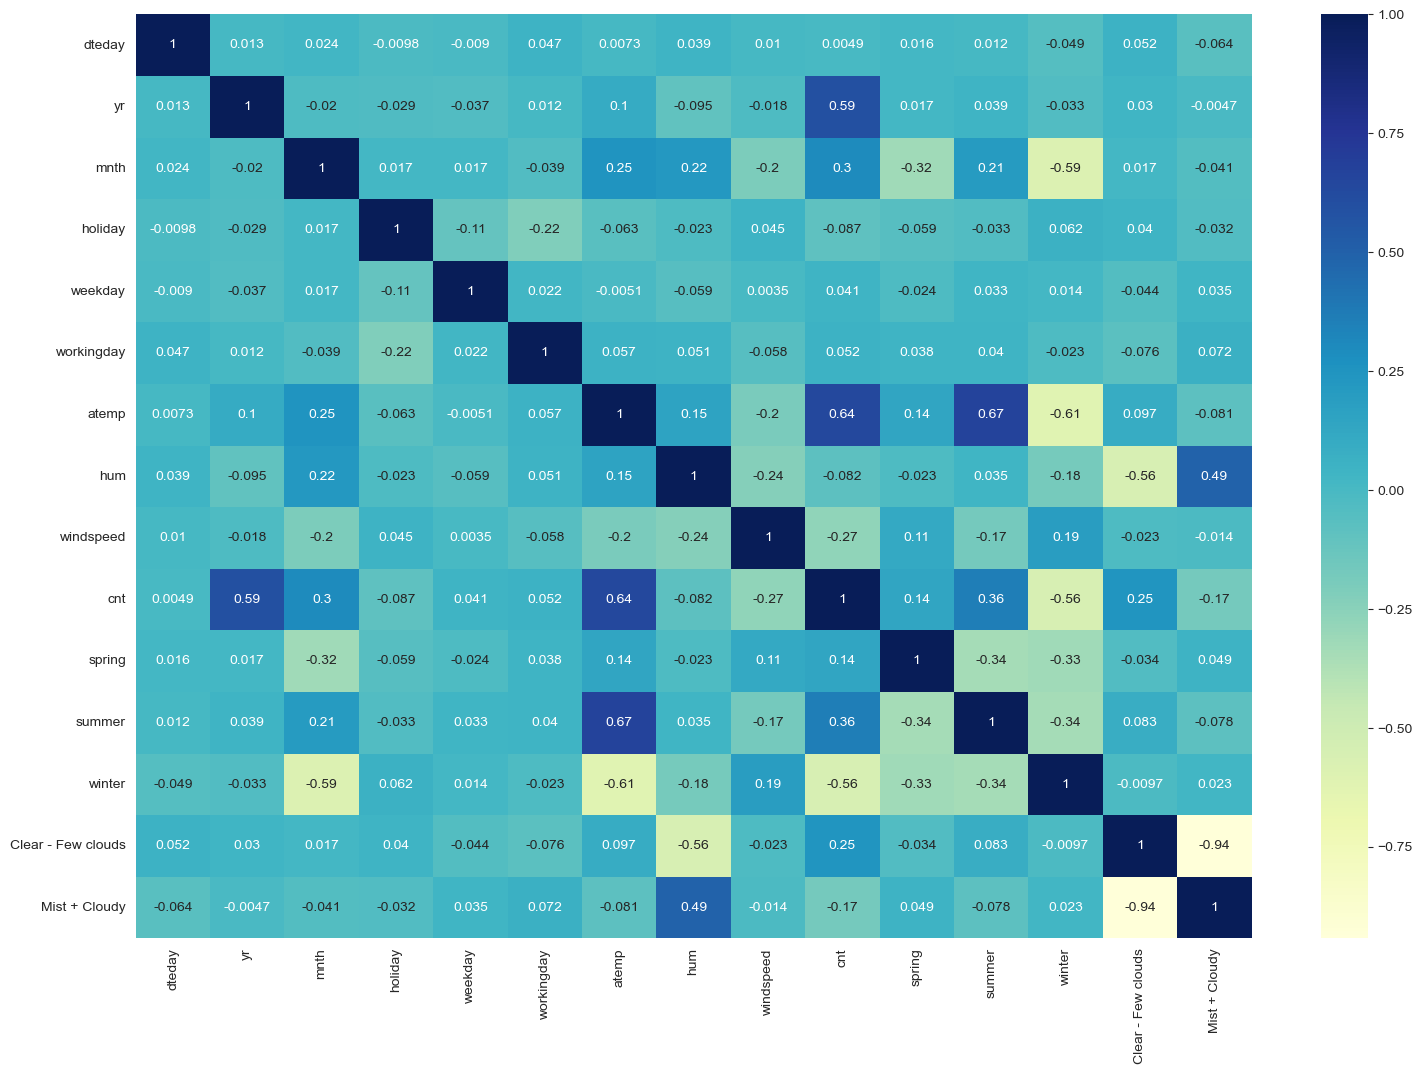

In [81]:
# Train data variables heatmap

plt.figure(figsize= (18,12))
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True);

4.4 Builiding Multiple Linear Regression Model using statsmodels.api

Now that our data is ready, we will build the model using statsmodels.api since we can have a detail description of all the statistical parameters.

We now separate the target variable form the train set and call it y. Our independent variables are named X.

We have 14 variables and initially we will consider all of them. Every time, we add a constant term to X as by default statsmodels.api gives us a regression line that passes through origin (0,0).

In [82]:
y_train = df_train.pop('cnt')
X_train = df_train

In [83]:
X_train_sm = sm.add_constant(X_train)    # add constant to X_train

In [84]:
lr1 = sm.OLS(y_train, X_train_sm).fit()    # create instance lr1

In [85]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.62e-182
Time:                        18:34:19   Log-Likelihood:                 494.41
No. Observations:                 511   AIC:                            -958.8
Df Residuals:                     496   BIC:                            -895.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1161      0.050      2.307      0.021       0.017       0.215
dteday                -0.0126      0.014     -0.894      0.372      -0.040       0.015
yr                     0.2354      0.008     27.948      0.000       0.219       0.252
mnth                   0.0074      0.026      0.284      0.777      -0.044       0.058
holiday               -0.0358      0.028     -1.267      0.206      -0.091       0.020
weekday                0.0473      0.012      3.820      0.000       0.023       0.072
workingday             0.0113      0.009      1.247      0.213      -0.006       0.029
atemp                  0.4722      0.035     13.579      0.000       0.404       0.541
hum                   -0.1340      0.038     -3.491      0.001      -0.209      -0.059
windspeed             -0.1645      0.027     -6.013      0.000      -0.218      -0.111
spring                -0.0372      0.020     -1.902      0.058      -0.076       0.001
summer                -0.0657      0.018     -3.706      0.000      -0.101      -0.031
winter                -0.1713      0.022     -7.671      0.000      -0.215      -0.127
Clear - Few clouds     0.2423      0.028      8.577      0.000       0.187       0.298
Mist + Cloudy          0.1877      0.027      7.018      0.000       0.135       0.240
==============================================================================
Omnibus:                       72.850   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.912
Skew:                          -0.777   Prob(JB):                     5.13e-35
Kurtosis:                       5.236   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What does R-squared value means?
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model.

In statistics, the coefficient of determination, called R², is a coefficient used in the context of a statistical model whose main purpose is to predict future results or test a hypothesis.

What is a ‘good’ R-squared value?
What qualifies as a “good” R-squared value will depend on the context. In some fields, such as the social sciences, even a relatively low R-squared value, such as 0.5, could be considered relatively strong. In other fields, the standards for a good R-squared reading can be much higher, such as 0.9 or above. In finance, an R-squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation. This is not a hard rule, however, and will depend on the specific analysis.



**p-value**

the probability that a particular statistical measure, such as the mean or standard deviation, of an assumed probability distribution will be greater than or equal to (or less than or equal to in some instances) observed results.

**VIF**

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results.

https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=A%20variance%20inflation%20factor%20(VIF)%20is%20a%20measure%20of%20the,adversely%20affect%20the%20regression%20results.

**Inference : R-squared and adjusted R-squared values are close and high (0.833 and 0.828 respectively), F-statistics values are acceptable. But the p-values of certain variables are high (mnth:0.777)

Let us also look at the multicollinearity among the variables

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,23.50
6,atemp,21.66
12,Clear - Few clouds,15.66
2,mnth,12.25
13,Mist + Cloudy,9.77
11,winter,6.04
9,spring,5.04
8,windspeed,4.80
10,summer,4.69
0,dteday,3.74


Decision : From above statistics figures we decide to drop dteday column



From the above statistics, we decide to drop mnth variable as it has a high p-value: 0.777 and build the model again.

In [88]:
X_train.drop('mnth', axis = 1, inplace = True)

In [89]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.20e-183
Time:                        18:34:19   Log-Likelihood:                 494.36
No. Observations:                 511   AIC:                            -960.7
Df Residuals:                     497   BIC:                            -901.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1211      0.047      2.574      0.010       0.029       0.214
dteday                -0.0126      0.014     -0.901      0.368      -0.040       0.015
yr                     0.2354      0.008     27.982      0.000       0.219       0.252
holiday               -0.0355      0.028     -1.259      0.208      -0.091       0.020
weekday                0.0475      0.012      3.851      0.000       0.023       0.072
workingday             0.0112      0.009      1.241      0.215      -0.007       0.029
atemp                  0.4726      0.035     13.617      0.000       0.404       0.541
hum                   -0.1328      0.038     -3.484      0.001      -0.208      -0.058
windspeed             -0.1641      0.027     -6.012      0.000      -0.218      -0.110
spring                -0.0413      0.013     -3.189      0.002      -0.067      -0.016
summer                -0.0678      0.016     -4.233      0.000      -0.099      -0.036
winter                -0.1764      0.013    -13.452      0.000      -0.202      -0.151
Clear - Few clouds     0.2428      0.028      8.619      0.000       0.187       0.298
Mist + Cloudy          0.1879      0.027      7.037      0.000       0.135       0.240
==============================================================================
Omnibus:                       73.030   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.892
Skew:                          -0.778   Prob(JB):                     3.14e-35
Kurtosis:                       5.246   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,atemp,21.51
6,hum,18.76
11,Clear - Few clouds,12.62
12,Mist + Cloudy,8.85
7,windspeed,4.58
9,summer,3.93
0,dteday,3.74
4,workingday,3.15
3,weekday,3.10
8,spring,2.42


**Inference : R-squared and adjusted R-squared values are close and high (0.833 and 0.829 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. Also atemp variable has high VIF so we drop atemp column.

In [91]:
X_train.drop('atemp', axis = 1, inplace = True)


In [92]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     139.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.07e-150
Time:                        18:34:19   Log-Likelihood:                 413.35
No. Observations:                 511   AIC:                            -800.7
Df Residuals:                     498   BIC:                            -745.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1959      0.055      3.582      0.000       0.088       0.303
dteday                -0.0238      0.016     -1.451      0.147      -0.056       0.008
yr                     0.2500      0.010     25.599      0.000       0.231       0.269
holiday               -0.0392      0.033     -1.188      0.235      -0.104       0.026
weekday                0.0486      0.014      3.365      0.001       0.020       0.077
workingday             0.0144      0.011      1.362      0.174      -0.006       0.035
hum                   -0.0073      0.043     -0.168      0.867      -0.092       0.078
windspeed             -0.1724      0.032     -5.396      0.000      -0.235      -0.110
spring                 0.0241      0.014      1.710      0.088      -0.004       0.052
summer                 0.0817      0.014      5.980      0.000       0.055       0.109
winter                -0.2376      0.014    -16.475      0.000      -0.266      -0.209
Clear - Few clouds     0.2989      0.033      9.160      0.000       0.235       0.363
Mist + Cloudy          0.2137      0.031      6.852      0.000       0.152       0.275
==============================================================================
Omnibus:                       20.347   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.168
Skew:                          -0.362   Prob(JB):                     1.26e-06
Kurtosis:                       3.867   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inference : R-squared and adjusted R-squared values are close and high (0.771 and 0.765 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. Let's see VIF values.

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,14.72
10,Clear - Few clouds,11.00
11,Mist + Cloudy,8.54
6,windspeed,4.58
0,dteday,3.73
4,workingday,3.14
3,weekday,3.09
9,winter,2.12
7,spring,2.07
8,summer,2.06


hum column has high p-value and it's VIF is also high. So we drop mnth column.

In [94]:
X_train.drop('hum', axis = 1, inplace = True)

In [95]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          8.59e-152
Time:                        18:34:20   Log-Likelihood:                 413.34
No. Observations:                 511   AIC:                            -802.7
Df Residuals:                     499   BIC:                            -751.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1889      0.035      5.374      0.000       0.120       0.258
dteday                -0.0240      0.016     -1.470      0.142      -0.056       0.008
yr                     0.2501      0.010     25.786      0.000       0.231       0.269
holiday               -0.0393      0.033     -1.190      0.234      -0.104       0.026
weekday                0.0489      0.014      3.409      0.001       0.021       0.077
workingday             0.0144      0.011      1.365      0.173      -0.006       0.035
windspeed             -0.1709      0.031     -5.570      0.000      -0.231      -0.111
spring                 0.0243      0.014      1.734      0.084      -0.003       0.052
summer                 0.0818      0.014      5.998      0.000       0.055       0.109
winter                -0.2371      0.014    -16.754      0.000      -0.265      -0.209
Clear - Few clouds     0.3009      0.030      9.926      0.000       0.241       0.360
Mist + Cloudy          0.2145      0.031      6.965      0.000       0.154       0.275
==============================================================================
Omnibus:                       20.291   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.074
Skew:                          -0.361   Prob(JB):                     1.32e-06
Kurtosis:                       3.866   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Clear - Few clouds,7.29
5,windspeed,4.54
10,Mist + Cloudy,4.49
0,dteday,3.52
3,weekday,3.06
4,workingday,3.06
8,winter,2.10
6,spring,2.07
7,summer,2.05
1,yr,2.04


**Inference : R-squared and adjusted R-squared values are close and high (0.771 and 0.766 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. holiday variable has high p-value so we drop it.

In [97]:
X_train.drop('holiday', axis = 1, inplace = True)

In [98]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     167.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.31e-152
Time:                        18:34:20   Log-Likelihood:                 412.61
No. Observations:                 511   AIC:                            -803.2
Df Residuals:                     500   BIC:                            -756.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1862      0.035      5.307      0.000       0.117       0.255
dteday                -0.0240      0.016     -1.471      0.142      -0.056       0.008
yr                     0.2505      0.010     25.822      0.000       0.231       0.270
weekday                0.0507      0.014      3.554      0.000       0.023       0.079
workingday             0.0171      0.010      1.651      0.099      -0.003       0.037
windspeed             -0.1721      0.031     -5.609      0.000      -0.232      -0.112
spring                 0.0251      0.014      1.794      0.073      -0.002       0.053
summer                 0.0822      0.014      6.027      0.000       0.055       0.109
winter                -0.2374      0.014    -16.770      0.000      -0.265      -0.210
Clear - Few clouds     0.2998      0.030      9.891      0.000       0.240       0.359
Mist + Cloudy          0.2136      0.031      6.935      0.000       0.153       0.274
==============================================================================
Omnibus:                       20.022   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.985
Skew:                          -0.354   Prob(JB):                     1.38e-06
Kurtosis:                       3.876   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Clear - Few clouds,7.12
4,windspeed,4.52
9,Mist + Cloudy,4.41
0,dteday,3.52
2,weekday,3.03
3,workingday,2.93
7,winter,2.10
5,spring,2.07
6,summer,2.05
1,yr,2.04


**Inference : **Though VIF figures are in acceptable range (?)**, dteday column has high p-value. So we drop summer column

In [100]:
X_train.drop('dteday', axis = 1, inplace = True)

In [101]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.73e-153
Time:                        18:34:20   Log-Likelihood:                 411.51
No. Observations:                 511   AIC:                            -803.0
Df Residuals:                     501   BIC:                            -760.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1738      0.034      5.097      0.000       0.107       0.241
yr                     0.2503      0.010     25.776      0.000       0.231       0.269
weekday                0.0509      0.014      3.560      0.000       0.023       0.079
workingday             0.0163      0.010      1.575      0.116      -0.004       0.037
windspeed             -0.1730      0.031     -5.632      0.000      -0.233      -0.113
spring                 0.0252      0.014      1.801      0.072      -0.002       0.053
summer                 0.0824      0.014      6.036      0.000       0.056       0.109
winter                -0.2365      0.014    -16.702      0.000      -0.264      -0.209
Clear - Few clouds     0.3007      0.030      9.910      0.000       0.241       0.360
Mist + Cloudy          0.2154      0.031      6.992      0.000       0.155       0.276
==============================================================================
Omnibus:                       25.058   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.127
Skew:                          -0.410   Prob(JB):                     2.36e-08
Kurtosis:                       3.989   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Clear - Few clouds,6.24
3,windspeed,4.46
8,Mist + Cloudy,4.03
1,weekday,3.02
2,workingday,2.90
6,winter,2.10
4,spring,2.07
5,summer,2.05
0,yr,2.04


Inference : This can be a good model. **Though VIF figures are in acceptable range (?)**, workingday column has high p-value. So we drop workingday column

In [103]:
X_train.drop('workingday', axis = 1, inplace = True)

In [104]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     207.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          6.29e-154
Time:                        18:34:20   Log-Likelihood:                 410.25
No. Observations:                 511   AIC:                            -802.5
Df Residuals:                     502   BIC:                            -764.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1859      0.033      5.585      0.000       0.120       0.251
yr                     0.2505      0.010     25.759      0.000       0.231       0.270
weekday                0.0513      0.014      3.583      0.000       0.023       0.079
windspeed             -0.1760      0.031     -5.734      0.000      -0.236      -0.116
spring                 0.0267      0.014      1.908      0.057      -0.001       0.054
summer                 0.0838      0.014      6.138      0.000       0.057       0.111
winter                -0.2357      0.014    -16.633      0.000      -0.264      -0.208
Clear - Few clouds     0.2988      0.030      9.841      0.000       0.239       0.358
Mist + Cloudy          0.2148      0.031      6.961      0.000       0.154       0.275
==============================================================================
Omnibus:                       26.726   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.804
Skew:                          -0.438   Prob(JB):                     1.02e-08
Kurtosis:                       3.980   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Clear - Few clouds,5.62
2,windspeed,4.46
7,Mist + Cloudy,3.57
1,weekday,3.01
5,winter,2.09
3,spring,2.06
0,yr,2.04
4,summer,2.03


**Inferences :
1. The VIF values of all the variables are in acceptable range. Also all the variables statistically seem significant.
2. Spring and winter variables have p-value 0.057.
3. R-squared, adjusted R-squared values are good and close (0.768 and 0.764 respectively).
4. This could be a good model.

If we want p-values of all our variables to be 0.000 we need to improve the model further. Let's see what happens if we drop winter variable.

In [106]:
X_train.drop('spring', axis = 1, inplace = True)

In [107]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     235.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.41e-154
Time:                        18:34:20   Log-Likelihood:                 408.40
No. Observations:                 511   AIC:                            -800.8
Df Residuals:                     503   BIC:                            -766.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1902      0.033      5.712      0.000       0.125       0.256
yr                     0.2509      0.010     25.733      0.000       0.232       0.270
weekday                0.0513      0.014      3.578      0.000       0.023       0.080
windspeed             -0.1662      0.030     -5.478      0.000      -0.226      -0.107
summer                 0.0708      0.012      5.964      0.000       0.048       0.094
winter                -0.2497      0.012    -20.539      0.000      -0.274      -0.226
Clear - Few clouds     0.3046      0.030     10.056      0.000       0.245       0.364
Mist + Cloudy          0.2209      0.031      7.181      0.000       0.160       0.281
==============================================================================
Omnibus:                       29.898   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.087
Skew:                          -0.470   Prob(JB):                     7.26e-10
Kurtosis:                       4.045   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Clear - Few clouds,4.99
2,windspeed,4.27
6,Mist + Cloudy,3.19
1,weekday,3.01
0,yr,2.04
3,summer,1.54
4,winter,1.54


### **Our model is ready**
1. R-squared value 0.766 and adjusted R-squared value 0.763.
2. P-value of F-statistic very low, almost close to 0.
3. All the variables are statistically significant. (VIF)

4.5 Residual Analysis of train data

**Making predictions for test data**

We prepare the test data by keeping the variables as in train data and transforming it using the scaler which we fitted to the train data. Note that we use only the transform method and not fit.transform on test data.

The predicted y values for test data are named y_test_pred. Let’s plot these values with respect to the actual y values, y_test.

In [109]:
X_train_sm.head()

,const,yr,weekday,windspeed,summer,winter,Clear - Few clouds,Mist + Cloudy
576,1.0,1,0.166667,0.239301,1,0,1,0
426,1.0,1,0.833333,0.220569,0,1,0,1
729,1.0,1,0.000000,0.663106,0,1,1,0
482,1.0,1,0.833333,0.656397,0,0,1,0
111,1.0,0,0.833333,0.380981,0,0,0,1


In [110]:
y_train_pred = lr.predict(X_train_sm)  # Predictiong the values for train data - y_train_pred

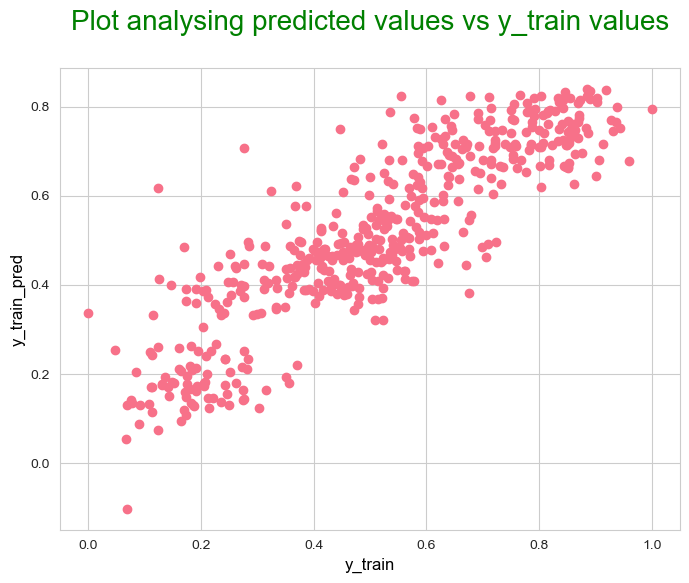

In [111]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred)
plt.title("Plot analysing predicted values vs y_train values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_train", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_train_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

Our model has predicted the y values very well.

Error terms or residuals are nothing but difference between the predicted values and actual values of y. These residuals should follow normal distribution, as per assumption of linear regression.

In [112]:
res = y_train - y_train_pred  # Calculate the residuals

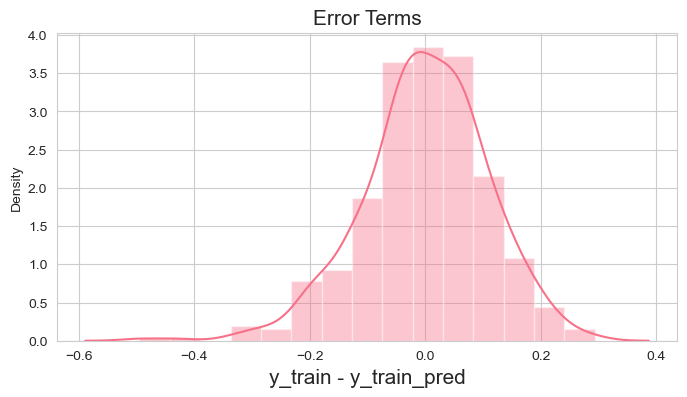

In [113]:
plt.figure(figsize=(8,4))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Inference :
1. Scatter plot of y_train and y_train_pred shows that our model has predicted the values very well for train
data.
2. The distribution plot shows that error terms are normally distributed.

### 5. Making predictions for test data

5.1 Preparing test data for analysis and prediction.

In [114]:
df_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
184,3,0,6,1,1,0,0.665417,0.637917,0.081479,6043,0,1,0,0,1
535,18,1,5,0,2,1,0.654692,0.690000,0.148017,6825,1,0,0,1,0
299,26,0,9,0,4,1,0.457046,0.812917,0.197763,2659,0,0,0,0,1
221,9,0,7,0,3,1,0.684983,0.424167,0.200258,4780,0,1,0,1,0
152,1,0,5,0,4,1,0.643942,0.305000,0.292287,4968,1,0,0,1,0


In [115]:
scale_var = ["dteday", "mnth","weekday", "atemp", "hum", "windspeed", "cnt"]

In [116]:
df_test[scale_var] = scaler.transform(df_test[scale_var])  # Scaling of test set using scaler.transform

In [117]:
df_test.describe()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,220.000000
mean,0.498485,0.481818,0.498347,0.040909,0.499242,0.722727,0.533778,0.643464,0.319953,0.517140,0.263636,0.250,0.254545,0.654545,0.313636
std,0.285446,0.500809,0.310752,0.198531,0.321912,0.448673,0.214914,0.142479,0.169883,0.217540,0.441609,0.434,0.436599,0.476601,0.465029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.314298,-0.042808,0.048205,0.000000,0.000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.272727,0.000000,0.166667,0.000000,0.344870,0.544439,0.198841,0.374885,0.000000,0.000,0.000000,0.000000,0.000000
50%,0.466667,0.000000,0.454545,0.000000,0.500000,1.000000,0.555003,0.637548,0.302796,0.522492,0.000000,0.000,0.000000,1.000000,0.000000
75%,0.766667,1.000000,0.727273,0.000000,0.833333,1.000000,0.715799,0.740026,0.418445,0.668891,1.000000,0.250,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.858328,0.981707,1.000000,1.000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [118]:
y_test = df_test.pop('cnt')
X_test = df_test

In [119]:
X_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,spring,summer,winter,Clear - Few clouds,Mist + Cloudy
184,0.100000,0,0.545455,1,0.166667,0,0.769660,0.657364,0.084219,0,1,0,0,1
535,0.600000,1,0.454545,0,0.333333,1,0.755582,0.711035,0.227262,1,0,0,1,0
299,0.866667,0,0.818182,0,0.666667,1,0.496145,0.837699,0.334206,0,0,0,0,1
221,0.300000,0,0.636364,0,0.500000,1,0.795343,0.437098,0.339570,0,1,0,1,0
152,0.033333,0,0.454545,0,0.666667,1,0.741471,0.314298,0.537414,1,0,0,1,0


In [120]:
X_train.head()

,yr,weekday,windspeed,summer,winter,Clear - Few clouds,Mist + Cloudy
576,1,0.166667,0.239301,1,0,1,0
426,1,0.833333,0.220569,0,1,0,1
729,1,0.000000,0.663106,0,1,1,0
482,1,0.833333,0.656397,0,0,1,0
111,0,0.833333,0.380981,0,0,0,1


In [121]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

In [122]:
X_test_new.head()

,yr,weekday,windspeed,summer,winter,Clear - Few clouds,Mist + Cloudy
184,0,0.166667,0.084219,1,0,0,1
535,1,0.333333,0.227262,0,0,1,0
299,0,0.666667,0.334206,0,0,0,1
221,0,0.500000,0.339570,1,0,1,0
152,0,0.666667,0.537414,0,0,1,0


In [123]:
X_test_sm = sm.add_constant(X_test_new)     # add a constant

5.2 Making Predictions

In [124]:
# Making predictions
y_test_pred = lr.predict(X_test_sm)

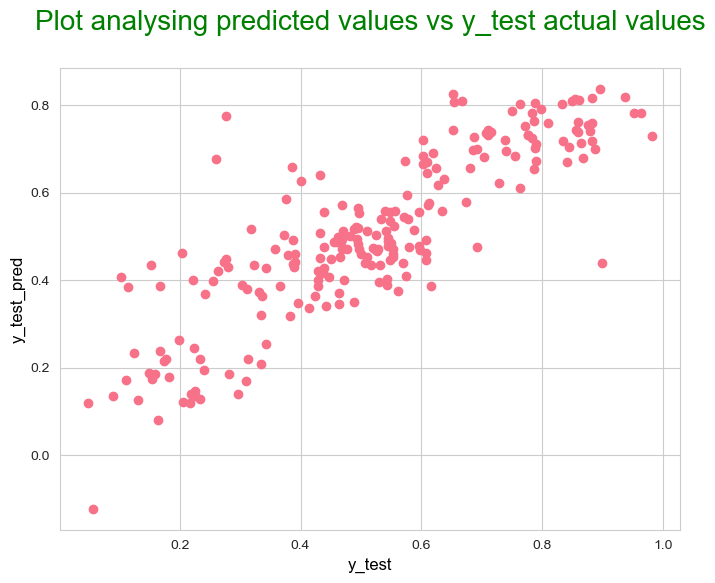

In [125]:
# Scatter plot for y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred)
plt.title("Plot analysing predicted values vs y_test actual values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_test_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [126]:
res_test = y_test - y_test_pred      # Calculate the residuals

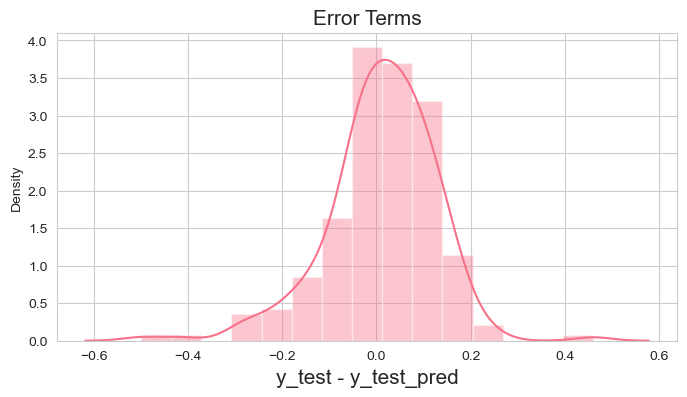

In [127]:
# Distribution of error terms

plt.figure(figsize=(8,4))
sns.distplot(res_test, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.show()

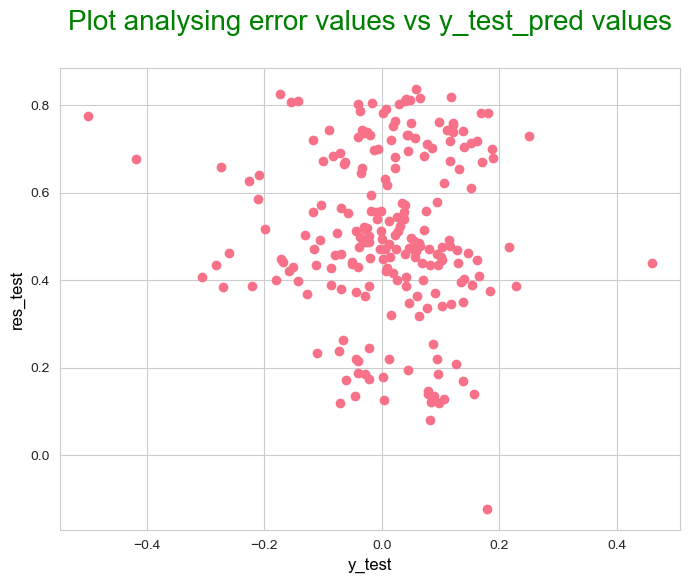

In [128]:
# Scatter plot for y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(res_test, y_test_pred)
plt.title("Plot analysing error values vs y_test_pred values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("res_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

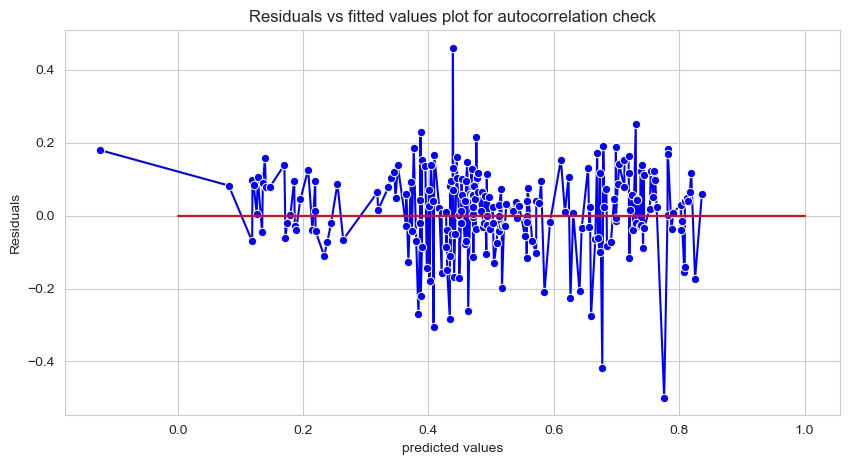

In [129]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_test_pred,res_test,marker='o',color='blue')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Inference :
1. Scatter plot of y_test and y_test_pred shows that our model has predicted the values very well for test
data as well.
2. The distribution plot shows that error terms for test data follow normal distribution.
3. Scatter plot of residuals and y_test_pred shows that there is no pattern in error terms. This confirms the homoscedasticity (homogeneity) assumption of linear regression.
4. Line plot of residuals shows that they are independent that means there is no correlation between them and are distributed around mean 0.

### 6. Calculating R-squared value

In [130]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7131647550810012

Adjusted R-squared value

In [131]:
X_test_new.shape

(220, 7)

In [132]:
R = 0.7131647550         # R_squared value that we got above

N = X_test_new.shape[0] # No. of rows for test data that means sample points

P = X_test_new.shape[1]  # Number of features (predictors) 

# Adjusted R-squared formula:

adjusted_r_sq = 1-((1-R)*(N-1)/(N-P-1))

adjusted_r_sq

0.7036937799292453

#### Train data :
1. R-squared value : 0.766
2. Adjusted R-squared value : 0.763

1. R-squared value 0.766 and adjusted R-squared value 0.763.

#### Test data :
1. R-squared value : 0.713164
2. Adjusted R-squared value : 0.703693

### Our Model is ready and all assumptions of Linear Regression are verified successfully.

In [133]:
lr.params

const                 0.190169
yr                    0.250862
weekday               0.051325
windspeed            -0.166243
summer                0.070844
winter               -0.249729
Clear - Few clouds    0.304621
Mist + Cloudy         0.220908
dtype: float64

### Model Equation :

### cnt = 0.190169 + (0.051325 x weekday) + (0.070844 x summer) + (0.220908 x "Mist + Cloudy") + (0.250862 x yr) + (0.304621 x "Clear - Few clouds") - (0.166243 x windspeed) - (0.249729 x winter)

## Top 3 Significant Variables and interpretation of their co-efficients:

"Clear - Few clouds": A coefficient value of 0.304621 indicates that a unit increase in "Clear - Few clouds" variable, increases the bikes demand by 0.304621 units (30.5%). Positive correlation.

** "yr": A coefficient value of 0.250862 indicates that a unit increase in yr variable, increase the bikes demand by 0.250862 units(25.0%). Positive correlation. But this is not a variable that we can handle.

"winter" : Basically there is a negative correlation between winter and bikes hire number. A coefficient value of 0.249729 indicates that a unit increase in winter variable, decreases the bikes demand by 0.249729 units (-24.97%). Negative correlation.

"Mist + Cloudy": A coefficient value of 0.220908 indicates that a unit increase in light_rain variable, increase the bikes demand by 0.268408 units(22.1%). Positive correlation.

#### Recommendations to Capital bikeshare company:

1. The best period for good business, when bikes demand is highest, is summer and early fall - June to September months every year. (This is evident from EDA)

2. Feeling temperature is directly related to the demand.

3. The demand for bicycles grows significantly from April and decreases significantly from October.

4. The demand for bicycles will be high between Thursdays and Saturdays, especially in spring, summer, and fall with "Clear - Few clouds" weather.

5. On days when the wind speed is high (usually this can happen between the months of November to March), the demand for bicycles will still be low.

***


#### A Key Performance Indicator (KPI):

...is a measurable value that helps an organization or individual to understand how effectively they are achieving their goals and objectives. KPIs are used to evaluate performance over time and to monitor progress towards achieving strategic objectives.

KPIs can be defined for different areas of an organization, such as sales, marketing, finance, and operations, among others. They can also be customized to fit specific business needs and goals.

KPIs are typically linked to specific targets or benchmarks and can be used to identify areas that require improvement or optimization. They provide a clear, quantifiable way to measure progress towards business objectives and to track performance over time.

Examples of KPIs in different areas of an organization might include:

Sales: Number of new customers, revenue growth, sales conversion rate
Marketing: Website traffic, social media engagement, lead generation
Finance: Profit margin, return on investment (ROI), cash flow
Operations: On-time delivery rate, inventory turnover, employee productivity
Overall, KPIs provide organizations with valuable insights into their performance and help them to make data-driven decisions to improve their business outcomes.

### An example code snippet for the dataframe:

import pandas as pd
import numpy as np

.# Create a sample dataframe
data = {'instant': [1, 2, 3],
        'dteday': ['2011-01-01', '2011-01-02', '2011-01-03'],
        'season': [1, 1, 1],
        'yr': [0, 0, 0],
        'mnth': [1, 1, 1],
        'holiday': [0, 0, 0],
        'weekday': [6, 0, 1],
        'workingday': [0, 0, 1],
        'weathersit': [2, 2, 1],
        'temp': [0.344167, 0.363478, 0.196364],
        'atemp': [0.363625, 0.353739, 0.189405],
        'hum': [0.805833, 0.696087, 0.437273],
        'windspeed': [0.160446, 0.248539, 0.248309],
        'casual': [331, 131, 120],
        'registered': [654, 670, 1229],
        'cnt': [985, 801, 1349]}

bikes = pd.DataFrame(data)

.# Convert 'dteday' column to datetime format
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

.# View the dataframe
print(bikes.head())

This code creates a dataframe with the same columns and values as the example you provided, and then converts the 'dteday' column to datetime format using the pd.to_datetime() method. This allows you to perform date-related operations on the column if needed. Finally, the code prints the first few rows of the dataframe using the head() method.